# Final Project 

## Introduction
This case study was proposed by IEFP Data Analysis Course as a Final Project.
The main objective of this study case is to perform real-world tasks of a (junior) data analyst by followggn the knowledge, methods and tools that were given throughout the cours. 

## Scenario

The data from this project refers to the activity of a small car workshop during the years 2022 and 2023. This workshop started using a computer tool to manage vehicle entries for repairs, with the aim of being able to better control its objectives of business. The workshop is located in two differnt areas of Lisbon (Carnaxide and Queluz).  
The scope of the project is limited to carrying out an Exploratory Data Analysis (EDA), as exhaustive as possible, so that the client (the workshop) can have a more accurate knowledge about its activity and, therefore, together with with the analyst, they may use additional resources (e.g. predictive modeling) to try to predict the behavior of some of the main business "drivers" in the future.


## Contextualization and definition of the business problem

Identify trends, preferences and the main differences between the two workshop areas (Carnaxide and Queluz)  
Find insigthts that can help the workshop to improve their effeciency during the vehicle reparation process in order to reduce costs and time.

## Guiding questions 

- **How is the data organized?**
- **Are there issues with credibility in this data?**
- **Are there any problems with the data?**
- **What steps are needed to ensure data cleaning?**
- **Were there any specific data quality issues, and how were they addressed during data processing?**
- **What steps were taken to handle missing data, duplicates, and outliers?**
- **How did the data types enhance data manipulation and understanding?**
- **Which columns underwent data type changes?**
- **What criteria were used to identify outliers, and how might they impact subsequent analyses?**
- **How will outliers be treated if found to significantly impact analyses in this study?**
- **What insights were gained from the descriptive statistics generated using the '.describe()' method?**
- **How did the '.mode()' method contribute to understanding the most frequently occurring values?**
- **Were there any notable patterns, trends, or characteristics revealed by the descriptive analysis?**
- **What is the overall reliability, accuracy, and timeliness of the dataset, considering the years 2022, 2023, and 2024?**
- **How were inconsistencies, missing data, duplicates, and outliers identified and addressed during the data processing phase?**
- **What is the distribution of total faturation, labor faturation, parts faturation, paint material faturation, and supplementary material faturation?**
- **How does the faturation vary between Carnaxide and Queluz workshops?**
- **What is the revenue difference between 2022 and 2023, and what factors could contribute to this significant change?**
- **How does the monthly faturation compare between 2022 and 2023?**
- **What is the average faturation per month for both years?**
- **How do the estimated and real labor hours compare?**
- **What is the average estimated and real labor hours per month for the years 2022 and 2023?**
- **How do Carnaxide and Queluz compare in terms of completing repairs within the estimated time?**
- **How many repairs were carried out in total, and what is the distribution between Carnaxide and Queluz?**
- **How did the number of repairs vary between the years 2022, 2023, and 2024?**
- **What is the total delay in labor days, and how is it distributed between Carnaxide and Queluz?**
- **How many car repairs experienced delays, and what is the percentage for Carnaxide and Queluz?**
- **How does the average delay per repair vary between car brands?**
- **What is the average duration for towed cars in the workshop before repair starts?**
- **How does the repair authorization duration for towed cars compare between Carnaxide and Queluz?**
- **What is the average time between repair authorization and repair scheduling for towed cars?**
- **How do the average repair times compare between Carnaxide and Queluz?**
- **Which car brands had the highest number of repairs, total faturation, parts faturation, and labour faturation?**
- **What car brands experienced the highest percentages of delays, and how does the average delay per repair vary among them?** among them?
ir vary among them?


## Libraries Imports

In [1]:
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler, QuantileTransformer, MaxAbsScaler
from sklearn.metrics import roc_curve, auc

## Dataset Import

In [3]:
# 'atlas2-v2.csv' file contains all information provided for this data analysis study;
# 'read_csv()' method was used to read the workshop 'CSV' file into a DataFrame.

data= pd.read_csv('atlas2-v2.csv', delimiter=';')

## Dataset Overview

In [4]:
# option to display every column. Same can be preformed for the rows (pd.set_option('display.max_rows', None)).

pd.set_option('display.max_columns', None) 
data

,id,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,imobilizado,data_reboque,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
0,3647,2023-10-02,Citroen,C4,57434,2023-10-04,Carnaxide,Definitiva,2023-10-09,0,0,0,0,0,Não,NaN,Concluído,2023-10-26,3,26/10/23,31/10/23,1,"2,5",2,0,0
1,3536,2023-09-18,Peugeot,308,0,2023-09-19,Carnaxide,Definitiva,2023-09-20,0,0,0,0,0,Não,NaN,Concluído,2023-11-07,4,7/11/23,10/11/23,0,4,5,0,0
2,635,2022-04-22,Fiat,Tipo,65844,2022-03-31,Carnaxide,Definitiva,2022-04-22,0,0,0,0,0,Não,NaN,Concluído,2022-04-27,2,27/4/22,29/4/22,1,0,2,0,0
3,3766,2023-10-17,Nissan,Qashqai,0,2023-10-17,Queluz,Definitiva,2023-10-23,0,"159,6","75,6",18,0,Não,NaN,Concluído,2023-11-16,2,16/11/23,17/11/23,0,0,2,"1,94","4,09"
4,2675,2023-05-05,BMW,X5,0,2023-05-05,Queluz,Definitiva,2023-05-08,0,"556,24","724,82","414,34",0,Não,NaN,Concluído,2023-05-08,5,8/5/23,15/5/23,1,6,12,"18,59","14,26"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,3932,2023-11-10,Peugeot,2008,0,2023-11-14,Carnaxide,Definitiva,2023-11-15,"466,09","146,43",0,0,0,Não,NaN,Concluído,2023-12-12,3,12/12/23,12/12/23,0,"1,5",0,0,"3,75"
994,3943,2023-11-13,Peugeot,5008,0,2023-11-14,Carnaxide,Definitiva,2023-11-28,"655,94","107,38",0,0,0,Não,NaN,Concluído,2023-12-20,3,20/12/23,21/12/23,0,"1,5",0,0,"2,75"
995,3843,2023-10-25,SEAT,Arona,41994,2023-10-30,Carnaxide,Definitiva,2023-10-30,"69,2","9,76",0,0,0,Não,NaN,Concluído,2023-11-17,2,17/11/23,17/11/23,0,"0,2",0,0,"0,25"
996,3836,2023-10-25,Opel,Astra,144728,2023-10-26,Queluz,Definitiva,2023-10-27,"632,14","32,76",0,0,0,Não,NaN,Concluído,2023-11-17,1,17/11/23,17/11/23,0,"0,5",0,0,"0,84"


In [5]:
# '.info()' method provided a useful overview of the DataFrame, including the data types of each column, the count of non-null values, and the total memory usage by the DataFrame.

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      998 non-null    int64  
 1   data_criacao            998 non-null    object 
 2   marca                   998 non-null    object 
 3   modelo                  998 non-null    object 
 4   kms                     998 non-null    object 
 5   data_peritagem          998 non-null    object 
 6   oficina                 998 non-null    object 
 7   estado                  998 non-null    object 
 8   autoriz_repar           998 non-null    object 
 9   orc_pecas               998 non-null    object 
 10  orc_mo_chapa            998 non-null    object 
 11  orc_mo_pintura          998 non-null    object 
 12  orc_mat_pintura         998 non-null    object 
 13  orc_mat_comp            998 non-null    object 
 14  imobilizado             998 non-null    ob

In [6]:
# '.shape' attribute was used to get the dimensions of a DataFrame, returning a tuple representing the number of rows and columns. The first element of the tuple is the number of rows, and the second element is the number of columns.

data.shape

(998, 26)

#### Main Topic of Dataset Overview

-
Data contains the historical car repair records for clients serviced by two workshops in the Lisbon metropolitan area for the years 2022 and 2023; 

- The information is organized by year and month within a 'CSV' file;
-  The 'CSV' file comprises 26 columns and 998 row;
-  The data is original and was provided directly by the workshop, constituting 'first-party information'.

## Data Process

Steps taken to ensure data cleanning:
- edited headers with similar formatting (snake_case and lowercase); 
- deleted rows that contained the presence of null values; 
- checked for duplicates; checked for extra and consecutive white spaces in string values; 
- removed columns that would not be relevant to the study; 
- added new columns useful for the study calculated from the existing columns; 
- checked the data types and converted them if necessary (example: if a date in “str” type then converts to “datetime” type); 
- checked for outliers (find out what could be the appropriate strategy to deal with outliers).

#### Headers name

The column names were translated into English in order to standardize the language used throughout this notebook file.  
Similarly, the values in the rows containing Portuguese words were also translated to English.


In [7]:
# This dictionary was created to be used with a DataFrame where the columns names are originally in Portuguese, and it provides the English translations for those column names. 
# '.rename()' method was used to rename the columns.

translation_dict = {
    'id': 'id',
    'data_criacao': 'creation_date',
    'marca': 'brand',
    'modelo': 'model',
    'kms': 'kms',
    'data_peritagem': 'appraisal_date',
    'oficina': 'workshop',
    'estado': 'status',
    'autoriz_repar': 'repair_authorization_date',
    'orc_pecas': 'parts_estimate(€)',
    'orc_mo_chapa': 'body_metal_labor_estimate(€)',
    'orc_mo_pintura': 'paint_labor_estimate(€)',
    'orc_mat_pintura': 'paint_material_estimate(€)',
    'orc_mat_comp': 'supplementary_material_estimate(€)',
    'imobilizado': 'immobilized',
    'data_reboque': 'towing_date',
    'ponto_situacao': 'situation_point',
    'agendamento_repar': 'repair_scheduling_date',
    'tempo_repar': 'repair_time',
    'data_real_inicio_repar': 'start_repair_date',
    'data_real_fim_repar': 'end_repair_date',
    'dias_atraso_sem_fds': 'days_delay_without_weekends',
    'mao_obra_chapa': 'body_metal_labor_hours',
    'mao_obra_pintura': 'paint_labor_hours',
    'mo_horas_orc_pintura': 'paint_labor_hours_estimate',
    'mo_horas_orc_chapa': 'body_metal_labor_hours_estimate'
}

data.rename(columns=translation_dict, inplace=True)

In [8]:
# The 'translation_dict_values' was created to translate the existing string values in rows to English.

translation_dict_values = {
    'Concluído': 'Completed',
    'Sim': 'Yes',
    'Não': 'No',
    'Definitiva': 'Final'
}

data['situation_point'] = data['situation_point'].replace(translation_dict_values)
data['immobilized'] = data['immobilized'].replace(translation_dict_values)
data['status'] = data['status'].replace(translation_dict_values)

#### Duplicates

Checked for duplicates rows by using '.duplicated()' method. No duplicates rows were found.  
By the observation of the dataset overview it is possible to verify that there is no duplicated columns (pd.set_option('display.max_rows', None)).

In [9]:
# '.duplicated()' method was used to identify duplicate rows in a DataFrame. It returns a boolean Series where each element indicates whether the corresponding row is a duplicate of a previous row. If a row is a duplicate, the corresponding value in the Series is True; otherwise, it is False.
# in the context of using '.duplicated()', the '.sum()' method was used to count the True values, representing the number of duplicate rows.

duplicated_rows = data.duplicated() 
print('Number of duplicated rows: ', duplicated_rows.sum())

Number of duplicated rows:  0


#### Data types

For better manipulation and understanding of the data, I changed the data types of some of the variables in the dataset:  
- "creation_date", "appraisal_date", "repair_authorization_date", "repair_scheduling_date", "towing_date", "start_repair_date" and "end_repair_date" from **object to datetime**;
- "kms", "repair_time" and "days_delay_without_weekends" from **object to int**;
- "parts_estimate(€)", "body_metal_labor_estimate(€)", "paint_labor_estimate(€)", "paint_material_estimate(€)", "supplementary_material_estimate(€)", "body_metal_labor_hours", "paint_labor_hours", "paint_labor_hours_estimate" and "body_metal_labor_hours_estimate" from **object to float**.

In [10]:
date_columns_year_first= ["creation_date", "appraisal_date", "repair_authorization_date", "repair_scheduling_date"] # string variables with date formatting YYYY-mm-dd.

date_columns_year_last = ["start_repair_date", "end_repair_date"] # string variables with date formatting dd/mm/yy

int_columns= ["kms", "repair_time", "days_delay_without_weekends"] 

float_columns= ["parts_estimate(€)", "body_metal_labor_estimate(€)", "paint_labor_estimate(€)", "paint_material_estimate(€)", "supplementary_material_estimate(€)", "body_metal_labor_hours", "paint_labor_hours", "paint_labor_hours_estimate", "body_metal_labor_hours_estimate"]

In [11]:
# 'loop for' used for iteration;
# 'to_datetime()' function was used to convert the columns containing dates in 'string' format to a 'DateTime' format. The format parameter is used to specify the format of the input dates.

for column in date_columns_year_first:
    data[column]=pd.to_datetime(data[column], format='%Y-%m-%d')

In [12]:
# unit='D' parameter in the 'pd.to_datetime()' function specifies the unit of time for the conversion. In this context, unit='D' stands for days.

data['towing_date'] = pd.to_datetime(data['towing_date'], unit='D', origin='1900-01-01')

In [13]:
for column in date_columns_year_last:
    data[column]=pd.to_datetime(data[column], format='%d/%m/%y')

In [14]:
# 'pd.to_numeric()' function was used to convert non-numeric arguments to a numeric type.
# '.fillna(0)' method was used to replace missing (NaN) values with a specified value, in this case, 0.
# '.astype(int)' method was used to convert the values of a Series or DataFrame to the integer data type.

for column in int_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].fillna(0).astype(int)
    data[column]=data[column].astype(int)

In [15]:
# this code iterates over specified float columns, cleans the values by removing the euro symbol, spaces, and replacing commas with dots, handles missing values, and converts the column to the float data type.

for column in float_columns:
    data[column] = data[column].replace({'€': '', r'\s+': ''}, regex=True).str.replace(',', '.')
    data[column] = data[column].replace(pd.NaT, np.nan)
    data[column] = data[column].astype(float)


The successful data type conversion of the specified columns can be observed through the '.dtypes' attribute.

In [16]:
# '.dtypes' attribute was used to display the data types of each column in the DataFrame. It returns a Series with the data type of each column.

data.dtypes

id                                             int64
creation_date                         datetime64[ns]
brand                                         object
model                                         object
kms                                            int32
appraisal_date                        datetime64[ns]
workshop                                      object
status                                        object
repair_authorization_date             datetime64[ns]
parts_estimate(€)                            float64
body_metal_labor_estimate(€)                 float64
paint_labor_estimate(€)                      float64
paint_material_estimate(€)                   float64
supplementary_material_estimate(€)           float64
immobilized                                   object
towing_date                           datetime64[ns]
situation_point                               object
repair_scheduling_date                datetime64[ns]
repair_time                                   

#### Extra white spaces in string values

A regular expression was  applied to identify cases (in string variables) where there are two or more consecutive spaces or spaces at the beginning/end.  
No extra white spaces in string values were found.

In [17]:
# The expression 'str.contains(r'\s{2,}|^\s|\s$').sum()' was used to count the number of occurrences where a string column contains two or more consecutive spaces or has leading/trailing spaces. The r'\s{2,}|^\s|\s$' is a regular expression pattern that checks for these conditions.

string_columns=['brand', 'model', 'workshop', 'status', 'immobilized','situation_point']

for column in string_columns:
    extra_spaces=data[column].str.contains(r'\s{2,}|^\s|\s$').sum()
    print(f'{column} has {extra_spaces} rows with extra spaces.')

brand has 0 rows with extra spaces.
model has 0 rows with extra spaces.
workshop has 0 rows with extra spaces.
status has 0 rows with extra spaces.
immobilized has 0 rows with extra spaces.
situation_point has 0 rows with extra spaces.


#### Missing values

Checked the existence of null values.

In [18]:
# '.isnull()' method was used to check for missing (NaN) values. It returns a boolean mask of the same shape as the original object, where True indicates the presence of a missing value and False indicates a non-missing value.
# '.sum()' method was used to calculate the total number of missing values after applying .isnull().

data.isnull().sum()

id                                      0
creation_date                           0
brand                                   0
model                                   0
kms                                     0
appraisal_date                          0
workshop                                0
status                                  0
repair_authorization_date               0
parts_estimate(€)                       0
body_metal_labor_estimate(€)            0
paint_labor_estimate(€)                 0
paint_material_estimate(€)              0
supplementary_material_estimate(€)      0
immobilized                             0
towing_date                           886
situation_point                         0
repair_scheduling_date                  0
repair_time                             0
start_repair_date                      12
end_repair_date                        12
days_delay_without_weekends             0
body_metal_labor_hours                  0
paint_labor_hours                 

In the **'start_repair_date'** and **'end_repair_date'** columns, there are **12 null values**. Given that the repair has been completed and the values in the 'days_delay_without_weekends' column for these 12 observations are equal to 0, we will assume for these particular cases that 'start_repair_date' is equivalent to 'repair_scheduling_date' and that 'end_repair_date' consequently represents the date of 'start_repair_date' plus the expected days corresponding to 'repair_time.  
In relation to **'towing_date'** null values correspond to vehicles that have not been towed, and therefore, do not have a date recorded. I chose to maintain null values as an indication that the car has not been towed. Using '0' or a 'string' could potentially lead to confusion in analysis and future interpretations.

In [19]:
data['start_repair_date'].fillna(data['repair_scheduling_date'], inplace=True)

In [20]:
# 'np.where()' takes three arguments: a condition, an array to select values where the condition is true, and another array to select values where the condition is false. The result is a new array with elements chosen from either of the latter two arrays based on the condition.

data['end_repair_date'] = np.where(
    data['end_repair_date'].isnull(),
    data['start_repair_date'] + pd.to_timedelta(data['repair_time'], unit='D'),
    data['end_repair_date']
)

In [21]:
data.isnull().sum()

id                                      0
creation_date                           0
brand                                   0
model                                   0
kms                                     0
appraisal_date                          0
workshop                                0
status                                  0
repair_authorization_date               0
parts_estimate(€)                       0
body_metal_labor_estimate(€)            0
paint_labor_estimate(€)                 0
paint_material_estimate(€)              0
supplementary_material_estimate(€)      0
immobilized                             0
towing_date                           886
situation_point                         0
repair_scheduling_date                  0
repair_time                             0
start_repair_date                       0
end_repair_date                         0
days_delay_without_weekends             0
body_metal_labor_hours                  0
paint_labor_hours                 

The 12 null values were successfully replaced.

#### Remove variables

The unique() function has been utilized to extract distinct values for each variable, facilitating the identification of potential variables that may lack relevance for the study. Consequently, these variables can be excluded, streamlining the dataset for further analysis.

In [22]:
# '.items()' method was used to return a view of a dictionary's key-value pairs as tuples, allowing for iteration over the items.
# '.nunique()' method was used to count the number of unique values in the DataFrame. It returns the count of distinct elements.

for key, value in translation_dict.items(): 
    unique_values = data[value].nunique()
    print('unique values of', value,':', unique_values)

unique values of id : 998
unique values of creation_date : 257
unique values of brand : 31
unique values of model : 162
unique values of kms : 750
unique values of appraisal_date : 253
unique values of workshop : 2
unique values of status : 1
unique values of repair_authorization_date : 253
unique values of parts_estimate(€) : 870
unique values of body_metal_labor_estimate(€) : 569
unique values of paint_labor_estimate(€) : 531
unique values of paint_material_estimate(€) : 676
unique values of supplementary_material_estimate(€) : 13
unique values of immobilized : 2
unique values of towing_date : 85
unique values of situation_point : 1
unique values of repair_scheduling_date : 249
unique values of repair_time : 21
unique values of start_repair_date : 247
unique values of end_repair_date : 228
unique values of days_delay_without_weekends : 16
unique values of body_metal_labor_hours : 44
unique values of paint_labor_hours : 28
unique values of paint_labor_hours_estimate : 464
unique value

The 'status' and 'situation_point' columns signify whether the repair has been approved and if it has been successfully completed, respectively. Both of these variables contain only a single value ('Definitive' and 'Completed', respectively), implying that all repairs were pre-approved and successfully completed. Also, the 'immobilized column indirectly provides redundant information already present in the 'towing_date' column. Therefore, taking into consideration the implicit information, I have chosen to exclude these three columns from this analysis ('status', 'situation_point' and 'immobilized').




In [23]:
# '.drop()' method was used to remove specified columns from the DataFrame. It returns a new DataFrame without the specified rows or columns removed, depending on the specified axis parameter.

data = data.drop(['status', 'situation_point','immobilized'], axis=1)

#### Outliers

In the context of this study, the boxplot aids in identifying potential outliers in the specified numeric features. Outliers can provide valuable insights into data quality, unusual patterns, or errors in the dataset. Addressing outliers appropriately is essential for accurate data analysis and modeling. The visual representation provided by the boxplot facilitates a quick understanding of the data and highlights any discrepant values that may require further investigation or treatment.

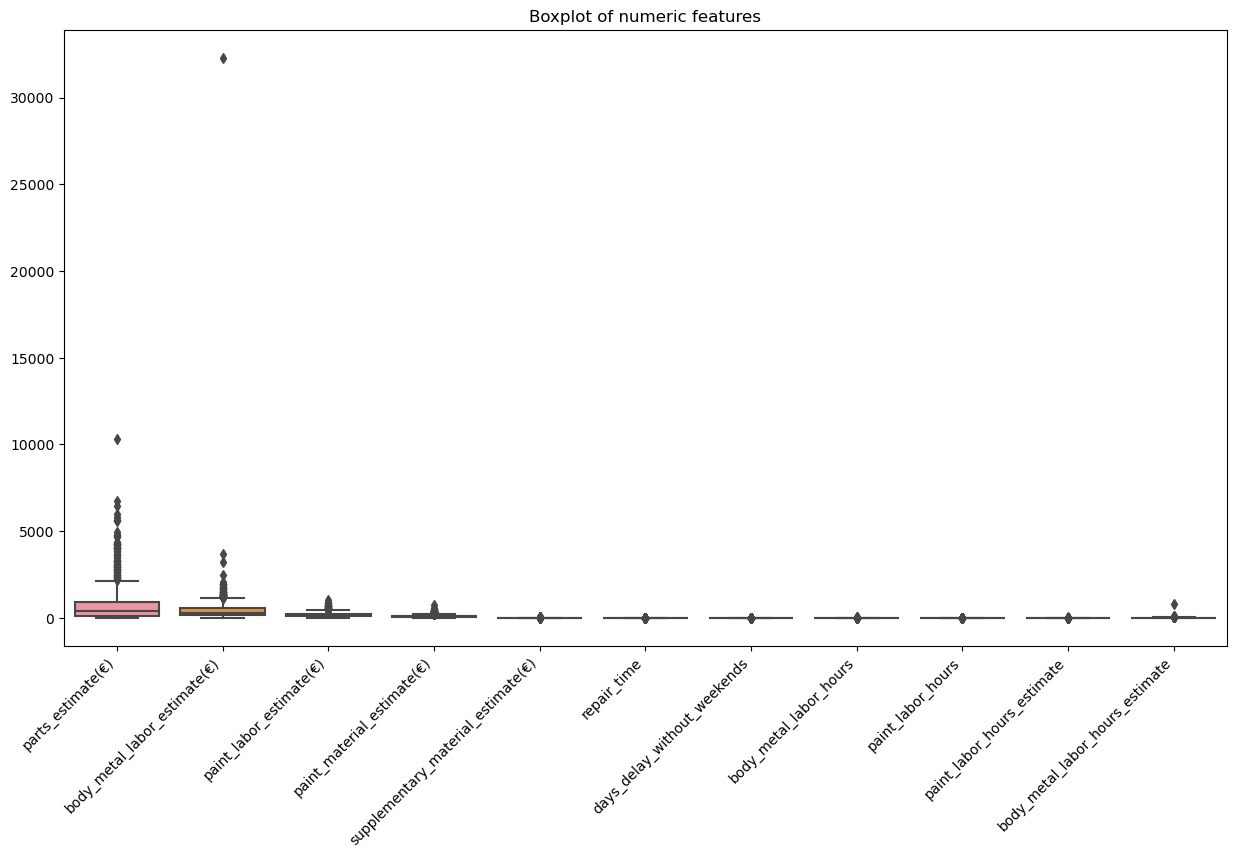

In [24]:
# Selected only the numeric features of interest (did not include 'kms').

numeric_features = ['parts_estimate(€)', 'body_metal_labor_estimate(€)', 'paint_labor_estimate(€)',
                    'paint_material_estimate(€)', 'supplementary_material_estimate(€)', 'repair_time',
                    'days_delay_without_weekends', 'body_metal_labor_hours', 'paint_labor_hours',
                    'paint_labor_hours_estimate', 'body_metal_labor_hours_estimate']

numeric_data = data[numeric_features]

plt.figure(figsize=(15, 8)) # sets the figure size
sns.boxplot(data=numeric_data) # create the boxplot
plt.xticks(rotation=45, ha="right") # rotates the x-axis labels for better readability
plt.title('Boxplot of numeric features') # adds a title

plt.show() # displays the plot

In [25]:
# Calculated the IQR for each feature
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Defined the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count of outliers for each numeric feature in the numeric_data DataFrame. 
# It checks for values below the lower bound or above the upper bound, using conditions based on the interquartile range (IQR). 
outliers_count = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()

print("Count of outliers for each variable:")
print(outliers_count)

Count of outliers for each variable:
parts_estimate(€)                      75
body_metal_labor_estimate(€)           56
paint_labor_estimate(€)                47
paint_material_estimate(€)             72
supplementary_material_estimate(€)     28
repair_time                           108
days_delay_without_weekends            95
body_metal_labor_hours                 55
paint_labor_hours                      60
paint_labor_hours_estimate             47
body_metal_labor_hours_estimate        56
dtype: int64


In [26]:
# To eventually remove all the outliers from de dataset:
    # outliers = ((numeric_data < lower_limit) | (numeric_data > upper_limit)).any(axis=1)
    # data = data[~outliers]

Data was filtered in order to identify and exclude the most extreme outlier found in the boxplot visualization.

In [27]:
outlier_1 = data[data['parts_estimate(€)'] > 10000]
outlier_1

,id,creation_date,brand,model,kms,appraisal_date,workshop,repair_authorization_date,parts_estimate(€),body_metal_labor_estimate(€),paint_labor_estimate(€),paint_material_estimate(€),supplementary_material_estimate(€),towing_date,repair_scheduling_date,repair_time,start_repair_date,end_repair_date,days_delay_without_weekends,body_metal_labor_hours,paint_labor_hours,paint_labor_hours_estimate,body_metal_labor_hours_estimate
307,3323,2023-08-18,Opel,Astra,69314,2023-08-21,Queluz,2023-08-25,10322.35,1034.78,407.08,269.48,0.0,2023-08-20,2023-08-29,14,2023-08-29,2023-10-04,13,7.0,8.0,10.44,26.53


In [28]:
outlier_2 = data[data['body_metal_labor_estimate(€)'] > 10000]
outlier_2

,id,creation_date,brand,model,kms,appraisal_date,workshop,repair_authorization_date,parts_estimate(€),body_metal_labor_estimate(€),paint_labor_estimate(€),paint_material_estimate(€),supplementary_material_estimate(€),towing_date,repair_scheduling_date,repair_time,start_repair_date,end_repair_date,days_delay_without_weekends,body_metal_labor_hours,paint_labor_hours,paint_labor_hours_estimate,body_metal_labor_hours_estimate
961,2518,2023-03-31,Mercedes-Benz,CLA (117),23939,2023-04-04,Carnaxide,2023-04-04,1362.25,32281.0,229.4,170.14,0.0,NaT,2023-05-03,3,2023-05-03,2023-05-04,0,2.0,1.0,5.88,827.72


In [29]:
data = data[data['parts_estimate(€)'] <= 10000]
data = data[data['body_metal_labor_estimate(€)'] <= 10000]

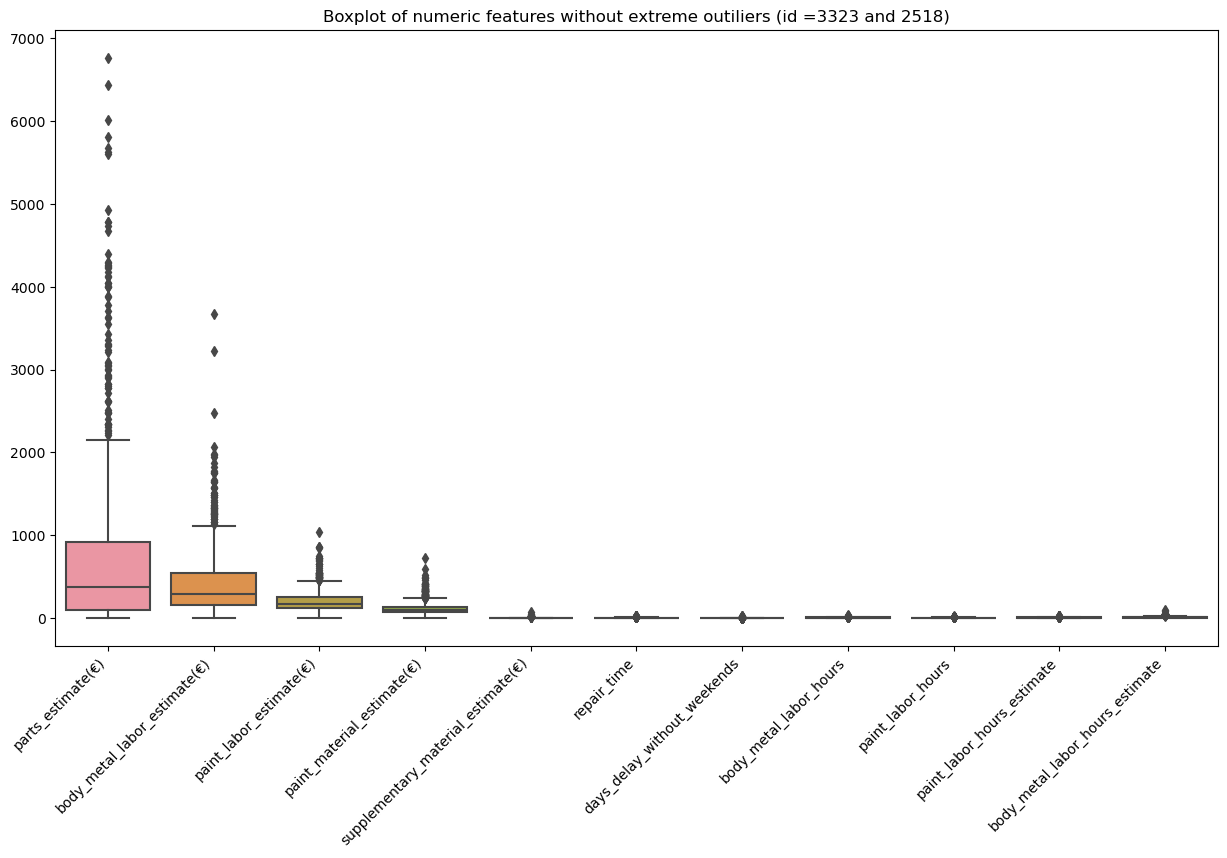

In [30]:
# Selected only the numeric features of interest (did not include 'kms').

numeric_features = ['parts_estimate(€)', 'body_metal_labor_estimate(€)', 'paint_labor_estimate(€)',
                    'paint_material_estimate(€)', 'supplementary_material_estimate(€)', 'repair_time',
                    'days_delay_without_weekends', 'body_metal_labor_hours', 'paint_labor_hours',
                    'paint_labor_hours_estimate', 'body_metal_labor_hours_estimate']

numeric_data = data[numeric_features]

plt.figure(figsize=(15, 8)) # sets the figure size
sns.boxplot(data=numeric_data) # create the boxplot
plt.xticks(rotation=45, ha="right") # rotates the x-axis labels for better readability
plt.title('Boxplot of numeric features without extreme outiliers (id =3323 and 2518)') # adds a title

plt.show() # displays the plot

In this specific context (dataset with 998 observations). I chose only to remove the most discrepant 'outliers' ('id' = 3323 and 2518) in advance, in order to preserve the representativeness of the diverse situations encountered by the workshops. With a relatively limited number of observations, eliminating all data points that were considered 'outliers' could result in a loss of valuable information. If 'outliers' are found to have a significant impact on subsequent analyses within this study, their treatment will be applied selectively, with proper justification provided for those specific cases.  
This approach aims to maintain transparency and integrity in the interpretation of the data and business context and allows to maintain a comprehensive view of the various situations faced by the workshops while being prepared to address possible effects of 'outliers' in more specific analyses.  
I chose to remove only two outlier ('id' = 3323 and 2518), as it stood out significantly and appeared to be the most discrepant among all, by a considerable margin.



#### Main Topics of Data Process:

- In general, data is accurate and up-to-date (2022 and 2023) but has some inconsistencies;
- Data consistency, missing data, duplicates, data type, language, text format and outliers were identify and carry on with success during data process;
- Dataset does not represent all car repairs taken during 2022 year (data for January 2022), therefore do not guaranteeing a total representation of the reality for this particular year; 
- There were 12 null values for the columns 'start_repair_date' and 'end_repair_date' (successfully replaced);
- Data does not present very significant anomalies or duplicates, and is therefore credible;
- To preserve the representativeness only two extreme outlier were excluded for the data analysis;
- If 'outliers' are found to have a significant impact on subsequent analyses within this study, their treatment will be applied selectively, with proper justification provided for those specific cases.
- For better manipulation and understanding of the data, the data types of some of the variables in the dataset were changed:
- 
"creation_date", "appraisal_date", "repair_authorization_date", "repair_scheduling_date", "towing_date", "start_repair_date" and "end_repair_date" from object to datetime;
- 
"kms", "repair_time" and "days_delay_without_weekends" from bject to int 
- 
"parts_estimate(€)", "body_metal_labor_estimate(€)", "paint_labor_estimate(€)", "paint_material_estimate(€)", "supplementary_material_estimate(€)", "body_metal_labor_hours", "paint_labor_hours", "paint_labor_hours_estimate" and "body_metal_labor_hours_estimate" from object to float.


## Descriptive Data Analysis

The '.describe()' method was used to generate descriptive statistics of the numeric variables of the DataFrame. It provides information such as the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. This summary helps to understand the distribution and characteristics of the data.

In [31]:
selected_columns = ['kms','parts_estimate(€)', 'body_metal_labor_estimate(€)', 'paint_labor_estimate(€)', 'paint_material_estimate(€)', 'supplementary_material_estimate(€)',
                     'repair_time', 'days_delay_without_weekends', 'body_metal_labor_hours', 'paint_labor_hours', 'paint_labor_hours_estimate',
                     'body_metal_labor_hours_estimate']

data[selected_columns].describe()

,kms,parts_estimate(€),body_metal_labor_estimate(€),paint_labor_estimate(€),paint_material_estimate(€),supplementary_material_estimate(€),repair_time,days_delay_without_weekends,body_metal_labor_hours,paint_labor_hours,paint_labor_hours_estimate,body_metal_labor_hours_estimate
count,9.960000e+02,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,6.712219e+04,731.126777,414.989799,195.119900,111.803153,0.627189,4.462851,0.287149,4.214006,3.303173,5.003062,10.641014
std,1.244162e+05,992.506765,388.242059,133.087602,81.259276,4.246728,3.721137,1.594550,3.827177,2.297059,3.412451,9.954973
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.771500e+03,95.125000,161.070000,120.070000,70.215000,0.000000,2.000000,0.000000,2.000000,2.000000,3.080000,4.130000
50%,4.831850e+04,373.620000,292.865000,170.105000,91.030000,0.000000,3.000000,0.000000,3.000000,3.000000,4.365000,7.510000
75%,9.419725e+04,917.322500,546.672500,252.840000,137.077500,0.000000,5.000000,0.000000,5.625000,4.000000,6.480000,14.020000
max,3.150297e+06,6764.470000,3675.390000,1034.000000,721.070000,67.000000,21.000000,22.000000,34.000000,21.000000,26.510000,94.240000


The .mode() method was used to display the most frequently occurring value of a DataFrame. If there are multiple modes (such as in 'body_metal_labor_hours_estimate'), it will return all of them. The .mode() function is particularly useful for identifying the most common values in a dataset.

In [32]:
data_mode=data[selected_columns].mode()
data_mode

,kms,parts_estimate(€),body_metal_labor_estimate(€),paint_labor_estimate(€),paint_material_estimate(€),supplementary_material_estimate(€),repair_time,days_delay_without_weekends,body_metal_labor_hours,paint_labor_hours,paint_labor_hours_estimate,body_metal_labor_hours_estimate
0,0.0,0.0,190.36,130.32,91.03,0.0,3.0,0.0,2.0,2.0,3.34,3.75
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.38


## Exploratory Data Analysis (EDA)

### Faturation

#### Labour price per hour

In [33]:
data['body_metal_labor_price']=data['body_metal_labor_estimate(€)']/data['body_metal_labor_hours_estimate']
data['paint_labor_price']=data['paint_labor_estimate(€)']/data['paint_labor_hours_estimate']

In [34]:
(data[['body_metal_labor_price','paint_labor_price']]).describe()

,body_metal_labor_price,paint_labor_price
count,991.000000,942.000000
mean,38.996263,38.998888
std,0.046122,0.032411
min,38.406250,38.838710
25%,38.988555,38.981629
50%,39.000000,39.000302
75%,39.008991,39.017964
max,39.354839,39.141593


In [35]:
# '.mean()' method was used to calculate the average of the values in the 'body_metal_labor_price' column, and '.round()' method was applied to round the mean to the nearest integer.

body_metal_labor_price=data['body_metal_labor_price'].mean().round()
print('Body metal labor price in € per hour:', body_metal_labor_price)

Body metal labor price in € per hour: 39.0


In [36]:
paint_labor_price=data['paint_labor_price'].mean().round()
print('Paint labor price in € per hour:', paint_labor_price)

Paint labor price in € per hour: 39.0


In [37]:
data = data.drop(['body_metal_labor_price', 'paint_labor_price'], axis=1)

Both paint and car body metal labor prices are 39€ per hour.

#### Total faturation

In [38]:
data['total_faturation_estimate(€)']= data['parts_estimate(€)'] + data['body_metal_labor_estimate(€)'] + data['paint_labor_estimate(€)'] + data['paint_material_estimate(€)'] + data['supplementary_material_estimate(€)']
data['total_labour_faturation_estimate(€)']= data['body_metal_labor_estimate(€)'] + data['paint_labor_estimate(€)']

In [39]:
total_faturation= data['total_faturation_estimate(€)'].sum().round()
print('Total faturation in €:', total_faturation)

Total faturation in €: 1447852.0


In [40]:
total_labour_faturation= data['total_labour_faturation_estimate(€)'].sum().round()
print('Total labour faturation in €:', total_labour_faturation)

Total labour faturation in €: 607669.0


In [41]:
total_parts_faturation= data['parts_estimate(€)'].sum().round()
print('Total parts faturation in €:', total_parts_faturation)

Total parts faturation in €: 728202.0


In [42]:
total_paint_material= data['paint_material_estimate(€)'].sum().round()
print('Total paint material faturation in €:', total_paint_material)

Total paint material faturation in €: 111356.0


In [43]:
total_supp_material= data['supplementary_material_estimate(€)'].sum().round()
print('Total supplementary material faturation in €:', total_supp_material)

Total supplementary material faturation in €: 625.0


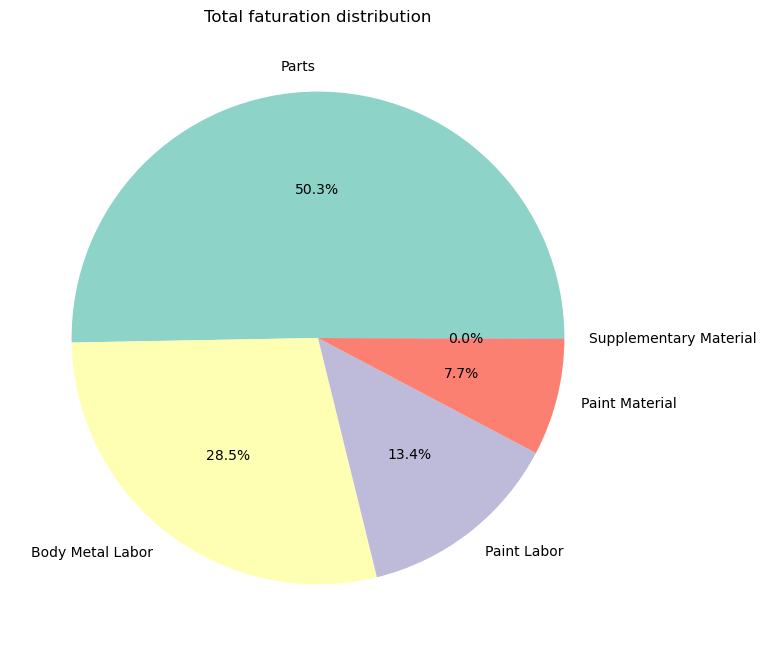

In [44]:
plt.figure(figsize=(10, 8))

# Matplotlib's plt.pie() function create a pie chart by visualizing the percentage distribution of total values for specific cost-related columns in the DataFrame.
plt.pie(data[['parts_estimate(€)','body_metal_labor_estimate(€)','paint_labor_estimate(€)','paint_material_estimate(€)', 'supplementary_material_estimate(€)']].sum(), labels=['Parts', 'Body Metal Labor', 'Paint Labor', 'Paint Material', 'Supplementary Material'], autopct='%1.1f%%', colors=plt.cm.Set3.colors)

plt.title('Total faturation distribution')
plt.show()

#### Faturation per workshop

##### Total faturation per workshop

In [45]:
# 'pd.DataFrame()' was used as a constructor function to create a DataFrame from the original Series 'workshops_faturation'.

workshops_faturation=data.groupby(['workshop'])['total_faturation_estimate(€)'].sum().round()
workshops_faturation_df = pd.DataFrame({'workshop': workshops_faturation.index, 'total_faturation': workshops_faturation.values})
workshops_faturation_df

,workshop,total_faturation
0,Carnaxide,933820.0
1,Queluz,514032.0


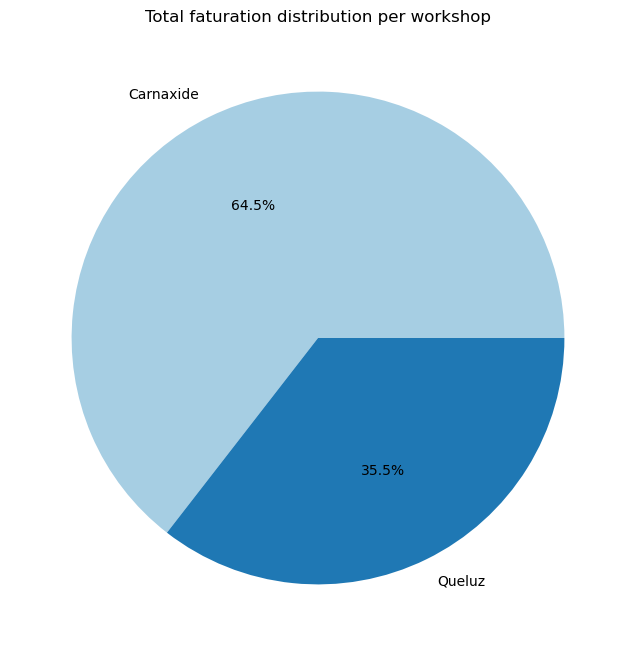

In [46]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_faturation.values, labels=workshops_faturation.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Total faturation distribution per workshop')
plt.show()

##### Total labour faturation per workshop

In [47]:
workshops_labour_faturation=data.groupby(['workshop'])['total_labour_faturation_estimate(€)'].sum().round()
workshops_labour_faturation_df = pd.DataFrame({'workshop': workshops_labour_faturation.index, 'total_labour_faturation_estimate(€)': workshops_labour_faturation.values})
workshops_labour_faturation_df

,workshop,total_labour_faturation_estimate(€)
0,Carnaxide,422945.0
1,Queluz,184724.0


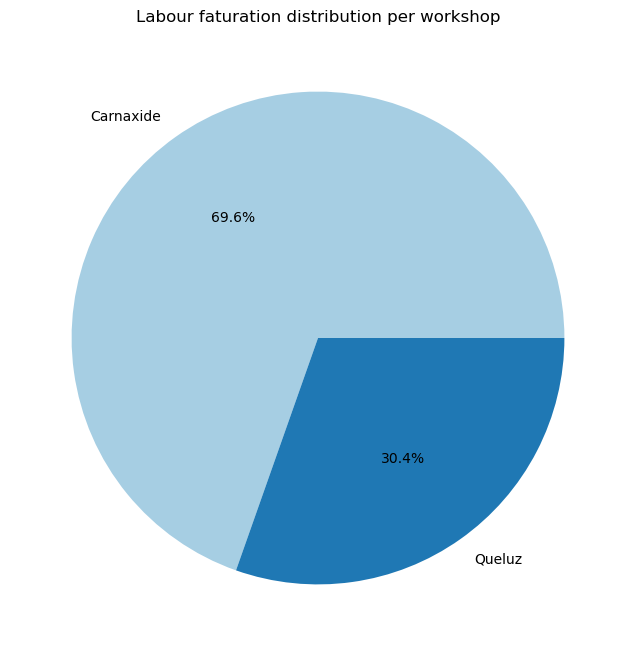

In [48]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_labour_faturation.values, labels=workshops_labour_faturation.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Labour faturation distribution per workshop')
plt.show()

##### Total parts faturation per workshop

In [49]:
workshops_parts_faturation=data.groupby(['workshop'])['parts_estimate(€)'].sum().round()
workshops_parts_faturation_df = pd.DataFrame({'workshop': workshops_parts_faturation.index, 'total_parts_faturation_per_workshop': workshops_parts_faturation.values})
workshops_parts_faturation_df

,workshop,total_parts_faturation_per_workshop
0,Carnaxide,434440.0
1,Queluz,293762.0


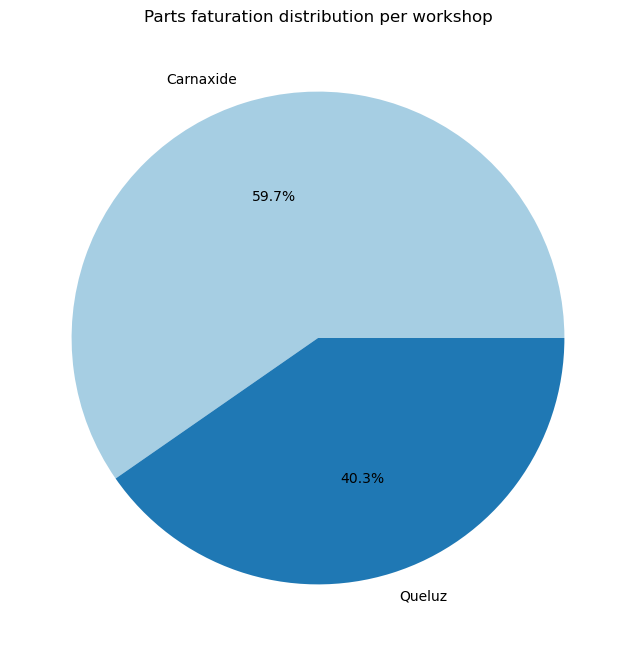

In [50]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_parts_faturation.values, labels=workshops_parts_faturation.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Parts faturation distribution per workshop')
plt.show()

##### Total paint material faturation per workshop¶

In [51]:
workshops_paint_mat_faturation = data.groupby(['workshop'])['paint_material_estimate(€)'].sum().round()
workshops_paint_mat_faturation_df = pd.DataFrame({'workshop': workshops_paint_mat_faturation.index, 'paint_material_faturation_per_workshop': workshops_paint_mat_faturation.values})
workshops_paint_mat_faturation_df

,workshop,paint_material_faturation_per_workshop
0,Carnaxide,75885.0
1,Queluz,35471.0


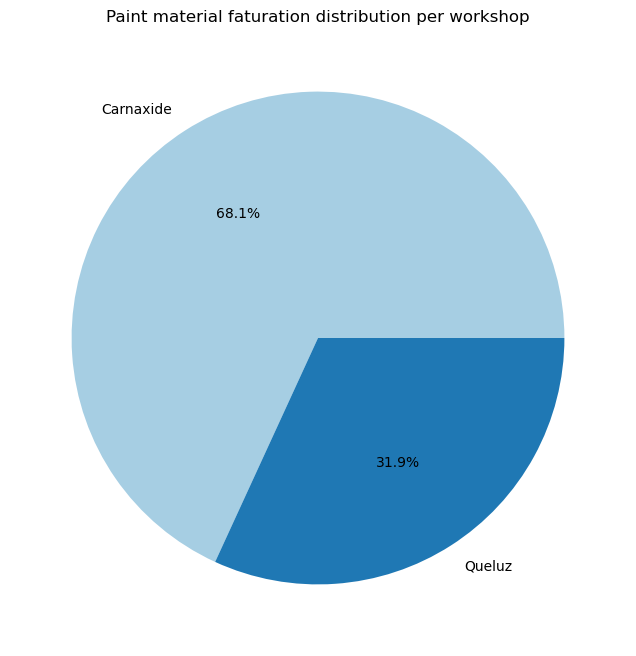

In [52]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_paint_mat_faturation.values, labels=workshops_paint_mat_faturation.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Paint material faturation distribution per workshop')
plt.show()

##### Total supplementary faturation per workshop

In [53]:
workshops_supp_mat_faturation = data.groupby(['workshop'])['supplementary_material_estimate(€)'].sum().round()
workshops_supp_mat_faturation_df = pd.DataFrame({'workshop': workshops_supp_mat_faturation.index, 'supplementary_material_faturation_per_workshop': workshops_supp_mat_faturation.values})
workshops_supp_mat_faturation_df

,workshop,supplementary_material_faturation_per_workshop
0,Carnaxide,550.0
1,Queluz,74.0


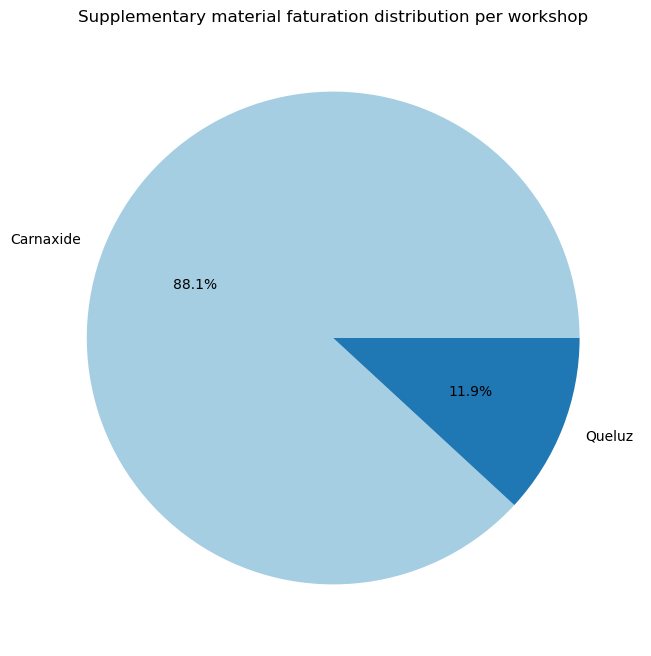

In [54]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_supp_mat_faturation.values, labels=workshops_supp_mat_faturation.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Supplementary material faturation distribution per workshop')
plt.show()

#### Faturation per year (2022 vs 2023)

In [55]:
# 'dt.year' and 'dt.month' properties were used for extracting the year and month components, respectively, from datetime Series 'start_repair_date'.

data['year']=data['start_repair_date'].dt.year
data['month']=data['start_repair_date'].dt.month

In [56]:
data_2022 = data[data['year'] == 2022]
data_2023 = data[data['year'] == 2023]

In [57]:
# '.unique()'  method was used to return an array containing unique elements from the Series 'month', allowing to identify distinct values within the data.

data_2022['month'].unique()

array([ 4, 12,  8,  6,  3, 11,  5,  9,  7, 10])

In [58]:
data_2023['month'].unique()

array([10, 11,  5, 12,  9,  8,  7,  6,  4,  3,  2,  1])

Dataset for 2022 is missing data for January and February.  
As it can be observed there are no available data for 'start repair date' for the corresponding months of January (1) and February (2) in the year 2022.

In [59]:
# The following code first groups the data by the 'year' column (by using '.groupby()' method), calculates the total faturation estimate for each year (by using '.sum()' method), sorts the results in ascending order based on the 'year' column (by using '.sort_values()' method), and then resets the index of the resulting DataFrame (by using '.reset_index()' method). 

total_faturation_year= data.groupby(['year'])['total_faturation_estimate(€)'].sum().sort_values(ascending=True)
total_faturation_year= total_faturation_year.reset_index()
total_faturation_year= total_faturation_year.sort_values(by='year', ascending=True)
total_faturation_year= total_faturation_year[total_faturation_year['year']<2024]
total_faturation_year

,year,total_faturation_estimate(€)
1,2022,76358.79
2,2023,1312465.34


In [60]:
total_faturation_year_ratio= total_faturation_year.loc[total_faturation_year['year'] == 2023, 'total_faturation_estimate(€)'].values[0] / total_faturation_year.loc[total_faturation_year['year'] == 2022, 'total_faturation_estimate(€)'].values[0]
total_faturation_year_ratio.round(1)

17.2

The year 2023 generated approximately 18 times more revenue than 2022.  
This significant difference in values cannot solely be attributed to the lack of data for January and February 2022.  
As further evidenced later on, the number of recorded repairs between the months of 2022 is considerably lower compared to the same months in 2023 (13 times lower).  
It's possible that the implementation of the automobile repair registration system only started to function effectively from 2023.

##### Total Faturation in 2022 and 2023 by month

In [61]:
total_faturation_2022= data_2022.groupby(['month'])['total_faturation_estimate(€)'].sum().sort_values(ascending=True)
total_faturation_2022= total_faturation_2022.reset_index()
total_faturation_2022=total_faturation_2022.sort_values(by='month', ascending=True)
total_faturation_2022

,month,total_faturation_estimate(€)
9,3,14923.61
0,4,2362.49
3,5,3787.28
2,6,3478.38
8,7,13790.11
5,8,8744.03
6,9,9926.94
1,10,2976.57
7,11,12467.18
4,12,3902.20


In [62]:
total_faturation_2022.describe()

,month,total_faturation_estimate(€)
count,10.00000,10.000000
mean,7.50000,7635.879000
std,3.02765,4903.045242
min,3.00000,2362.490000
25%,5.25000,3555.605000
50%,7.50000,6323.115000
75%,9.75000,11832.120000
max,12.00000,14923.610000


In [63]:
total_faturation_2023= data_2023.groupby(['month'])['total_faturation_estimate(€)'].sum().sort_values(ascending=True)
total_faturation_2023= total_faturation_2023.reset_index()
total_faturation_2023=total_faturation_2023.sort_values(by='month', ascending=True)
total_faturation_2023

,month,total_faturation_estimate(€)
1,1,13761.99
2,2,20773.13
0,3,6059.55
3,4,39311.41
4,5,122512.22
6,6,137400.62
9,7,159732.18
7,8,140354.19
5,9,131836.61
10,10,176536.52


In [64]:
total_faturation_2023.describe()

,month,total_faturation_estimate(€)
count,12.000000,12.000000
mean,6.500000,109372.111667
std,3.605551,70399.228481
min,1.000000,6059.550000
25%,3.750000,34676.840000
50%,6.500000,134618.615000
75%,9.250000,153406.567500
max,12.000000,212888.890000


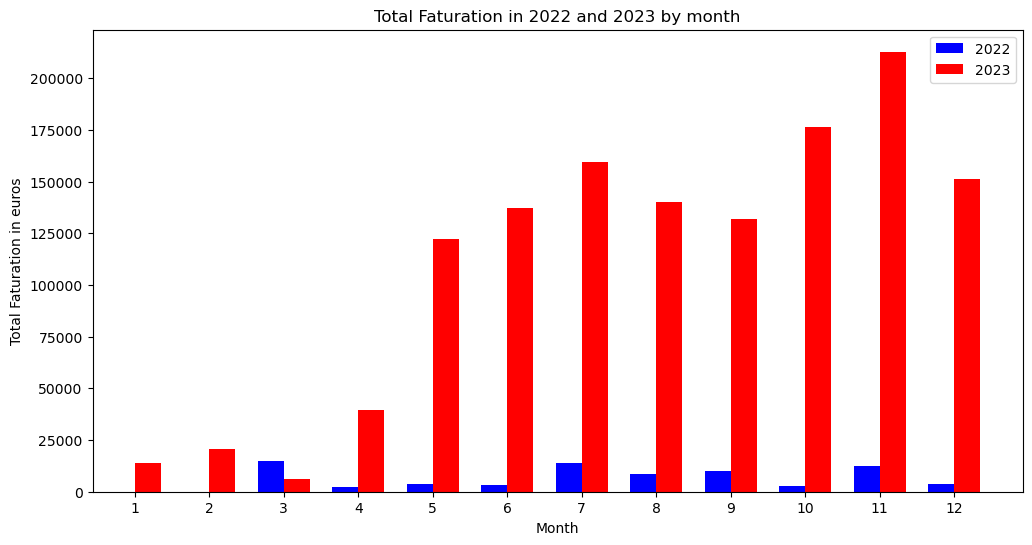

In [65]:
# 'bar_width/2': Shifts the bars to the left, creating space between them.
# 'width=bar_width': Sets the width of each bar in the chart.

plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_faturation_2022['month'] - bar_width/2, total_faturation_2022['total_faturation_estimate(€)'], width=bar_width, color='blue', label='2022')
plt.bar(total_faturation_2023['month'] + bar_width/2, total_faturation_2023['total_faturation_estimate(€)'], width=bar_width, color='red', label='2023')

plt.title('Total Faturation in 2022 and 2023 by month')
plt.xlabel('Month')
plt.ylabel('Total Faturation in euros')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)

plt.show()

##### Total labour faturation in 2022 and 2023 by month

In [66]:
total_labour_faturation_2022= data_2022.groupby(['month'])['total_labour_faturation_estimate(€)'].sum().sort_values(ascending=True)
total_labour_faturation_2022= total_labour_faturation_2022.reset_index()
total_labour_faturation_2022= total_labour_faturation_2022.sort_values(by='month', ascending=True)
total_labour_faturation_2022

,month,total_labour_faturation_estimate(€)
9,3,6888.98
1,4,1540.73
0,5,1295.05
3,6,2122.01
7,7,5111.08
5,8,2734.24
8,9,6077.47
2,10,2055.68
6,11,4902.19
4,12,2726.24


In [67]:
total_labour_faturation_2023= data_2023.groupby(['month'])['total_labour_faturation_estimate(€)'].sum().sort_values(ascending=True)
total_labour_faturation_2023= total_labour_faturation_2023.reset_index()
total_labour_faturation_2023= total_labour_faturation_2023.sort_values(by='month', ascending=True)
total_labour_faturation_2023

,month,total_labour_faturation_estimate(€)
1,1,5012.35
2,2,7245.38
0,3,2209.60
3,4,16027.95
7,5,55174.93
5,6,51447.36
10,7,71706.13
4,8,48599.45
6,9,54902.95
9,10,71032.93


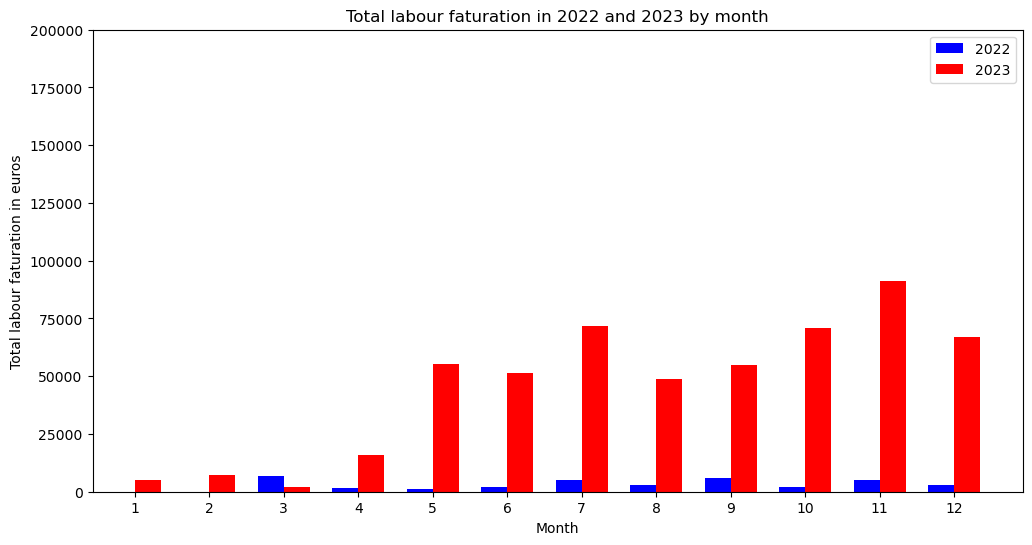

In [68]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_labour_faturation_2022['month'] - bar_width/2, total_labour_faturation_2022['total_labour_faturation_estimate(€)'], width=bar_width, color='blue', label='2022')
plt.bar(total_labour_faturation_2023['month'] + bar_width/2, total_labour_faturation_2023['total_labour_faturation_estimate(€)'], width=bar_width, color='red', label='2023')

plt.title('Total labour faturation in 2022 and 2023 by month')
plt.xlabel('Month')
plt.ylabel('Total labour faturation in euros')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)
plt.ylim(top=200000)

plt.show()

- As previously mentioned, there are no data for the months of January and February 2022.
- It is evident that the car repairs faturation sharply increased from May 2023 onward. 
- Several reasons could could be related: the computer system might not have been fully implemented, workshops were not operating at 100%, data entry errors, accidental data loss, a drastic increase in clients (very unlikely?), etc. 
- The months with the highest billing volume in 2023 are October and November. In contrast, March shows the lowest billing volume in the year 2023.


### Labour hours 

#### Total estimate labour hours in 2022 and 2023 by month.

In [69]:
data['total_labour_estimate_hours']=data['paint_labor_hours_estimate']+data['body_metal_labor_hours_estimate']
data_2022 = data[data['year'] == 2022]
data_2023 = data[data['year'] == 2023]

In [70]:
total_estimated_labour_hours=data['total_labour_estimate_hours'].sum()
print('Total estimated labour hours:', total_estimated_labour_hours)

Total estimated labour hours: 15581.5


In [71]:
total_labour_estimate_hours_2022= data_2022.groupby(['month'])['total_labour_estimate_hours'].sum().sort_values(ascending=True)
total_labour_estimate_hours_2022= total_labour_estimate_hours_2022.reset_index()
total_labour_estimate_hours_2022= total_labour_estimate_hours_2022.sort_values(by='month', ascending=True)
total_labour_estimate_hours_2022

,month,total_labour_estimate_hours
9,3,176.67
1,4,39.50
0,5,33.21
3,6,54.41
7,7,131.04
5,8,70.11
8,9,155.84
2,10,52.71
6,11,125.69
4,12,69.90


In [72]:
total_labour_estimate_hours_2022.describe()

,month,total_labour_estimate_hours
count,10.00000,10.000000
mean,7.50000,90.908000
std,3.02765,51.670512
min,3.00000,33.210000
25%,5.25000,53.135000
50%,7.50000,70.005000
75%,9.75000,129.702500
max,12.00000,176.670000


In [73]:
total_labour_estimate_hours_2023= data_2023.groupby(['month'])['total_labour_estimate_hours'].sum().sort_values(ascending=True)
total_labour_estimate_hours_2023= total_labour_estimate_hours_2023.reset_index()
total_labour_estimate_hours_2023= total_labour_estimate_hours_2023.sort_values(by='month', ascending=True)
total_labour_estimate_hours_2023

,month,total_labour_estimate_hours
1,1,128.51
2,2,185.78
0,3,56.66
3,4,410.98
7,5,1414.76
5,6,1319.15
10,7,1838.66
4,8,1246.09
6,9,1407.78
9,10,1821.42


In [74]:
total_labour_estimate_hours_2023.describe()

,month,total_labour_estimate_hours
count,12.000000,12.000000
mean,6.500000,1157.813333
std,3.605551,772.511371
min,1.000000,56.660000
25%,3.750000,354.680000
50%,6.500000,1363.465000
75%,9.250000,1744.980000
max,12.000000,2344.470000


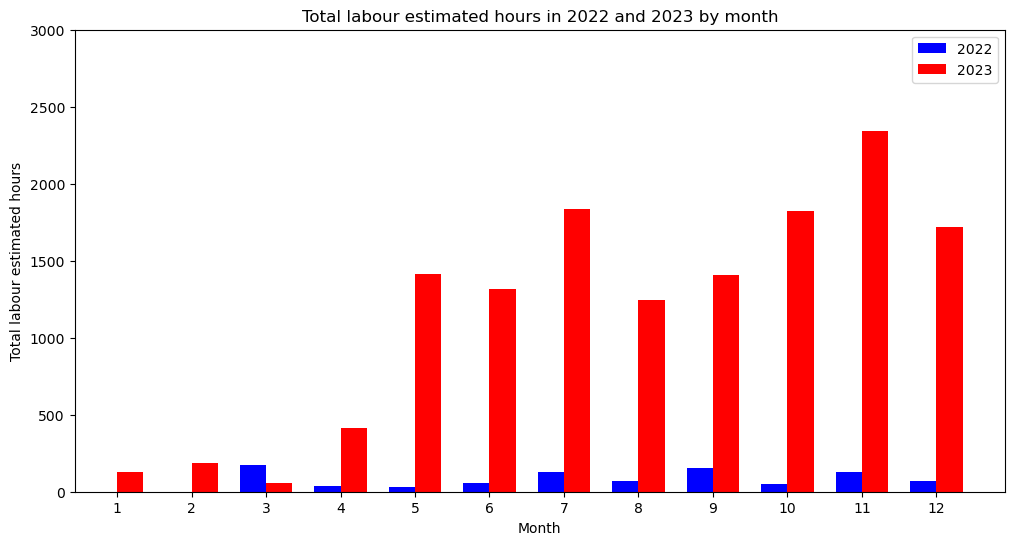

In [75]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_labour_estimate_hours_2022['month'] - bar_width/2, total_labour_estimate_hours_2022['total_labour_estimate_hours'], width=bar_width, color='blue', label='2022')
plt.bar(total_labour_estimate_hours_2023['month'] + bar_width/2, total_labour_estimate_hours_2023['total_labour_estimate_hours'], width=bar_width, color='red', label='2023')

plt.title('Total labour estimated hours in 2022 and 2023 by month')
plt.xlabel('Month')
plt.ylabel('Total labour estimated hours')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)
plt.ylim(top=3000)

plt.show()

- The data distribution is similar to that highlighted in 'Total Faturation.'; 
- On average, 1227 and 91 estimated labor hours were performed per month during the years 2022 and 2023, respectively;
- May and November were the months with the highest recorded estimated labor hours;
- In the other hand, the first four months of the year 2023 accounted for fewer estimated labor hours.

#### Total real labour hours in 2022 and 2023 by month

##### Total real labour hours

In [76]:
data['labour_hours']= data['body_metal_labor_hours']+data['paint_labor_hours']
total_labour_hours=data['labour_hours'].sum()
print('Total labour hours:', total_labour_hours.round())

Total labour hours: 7487.0


##### Estimated/real labour hours ratio

In [77]:
estimated_real_labour_hours_ratio=total_estimated_labour_hours/total_labour_hours
estimated_real_labour_hours_ratio.round(1)

2.1

Approximately 2.1 times fewer labor hours were carried out than were budgeted, indicating that the actual time spent on labor was significantly lower than the initially estimated or budgeted time.

In [78]:
data['total_labour_real_hours']=data['body_metal_labor_hours']+data['paint_labor_hours']
data_2022 = data[data['year'] == 2022]
data_2023 = data[data['year'] == 2023]

In [79]:
total_labour_real_hours_2022= data_2022.groupby(['month'])['total_labour_real_hours'].sum().sort_values(ascending=True)
total_labour_real_hours_2022= total_labour_real_hours_2022.reset_index()
total_labour_real_hours_2022= total_labour_real_hours_2022.sort_values(by='month', ascending=True)
total_labour_real_hours_2022.round()

,month,total_labour_real_hours
9,3,100.0
1,4,24.0
0,5,21.0
4,6,42.0
7,7,70.0
5,8,46.0
8,9,76.0
2,10,33.0
6,11,58.0
3,12,37.0


In [80]:
total_labour_real_hours_2022.describe()

,month,total_labour_real_hours
count,10.00000,10.000000
mean,7.50000,50.665000
std,3.02765,25.164239
min,3.00000,21.150000
25%,5.25000,34.000000
50%,7.50000,43.750000
75%,9.75000,66.750000
max,12.00000,100.500000


In [81]:
total_labour_real_hours_2023= data_2023.groupby(['month'])['total_labour_real_hours'].sum().sort_values(ascending=True)
total_labour_real_hours_2023= total_labour_real_hours_2023.reset_index()
total_labour_real_hours_2023= total_labour_real_hours_2023.sort_values(by='month', ascending=True)
total_labour_real_hours_2023=total_labour_real_hours_2023.round()

In [82]:
total_labour_real_hours_2023.describe()

,month,total_labour_real_hours
count,12.000000,12.000000
mean,6.500000,550.666667
std,3.605551,363.197751
min,1.000000,24.000000
25%,3.750000,176.750000
50%,6.500000,654.000000
75%,9.250000,809.750000
max,12.000000,1067.000000


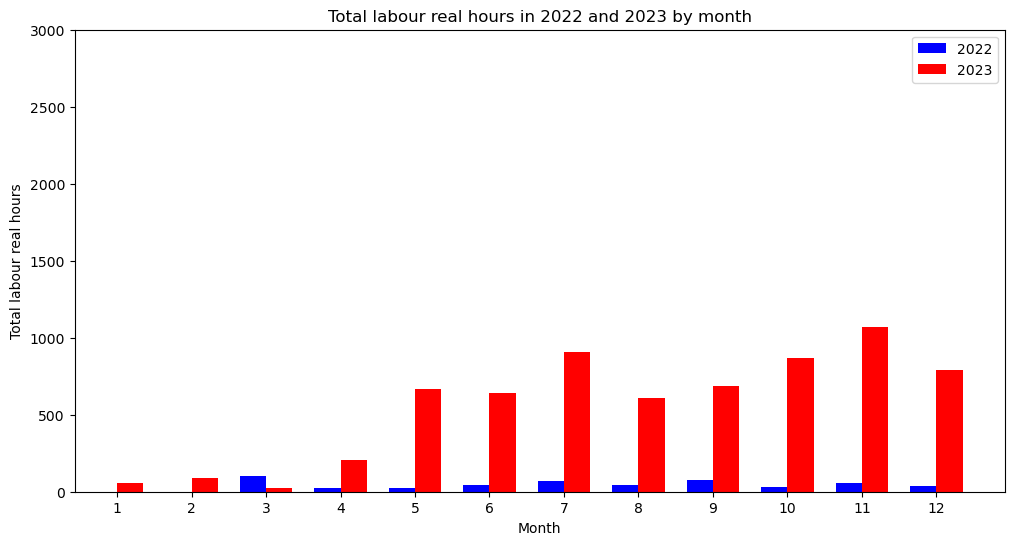

In [83]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_labour_real_hours_2022['month'] - bar_width/2, total_labour_real_hours_2022['total_labour_real_hours'], width=bar_width, color='blue', label='2022')
plt.bar(total_labour_real_hours_2023['month'] + bar_width/2, total_labour_real_hours_2023['total_labour_real_hours'], width=bar_width, color='red', label='2023')

plt.title('Total labour real hours in 2022 and 2023 by month')
plt.xlabel('Month')
plt.ylabel('Total labour real hours')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)
plt.ylim(top=3000)

plt.show()

- The data distribution is **different** to that highlighted in 'Total Faturation.';
- On average, 551 and 51 real labor hours were performed per month during the years 2022 and 2023, respectively;
- July and November were the months with the highest recorded real labor hours;
- By comparing with the previous graph ('Total labour estimated hours'), it is possible to observe that the 'estimated labour hours' did not reflect in terms of 'real labour hours'.
- This is even more evident in the case of May 2023, where the 'estimated labour hours' do not align with the 'real labour hours' in proportion when compared to the other months of the year.
- The first four months of the year 2023 accounted for fewer real labor hours.

##### Total real labour hours vs total labour estimate hours in 2022 by month.

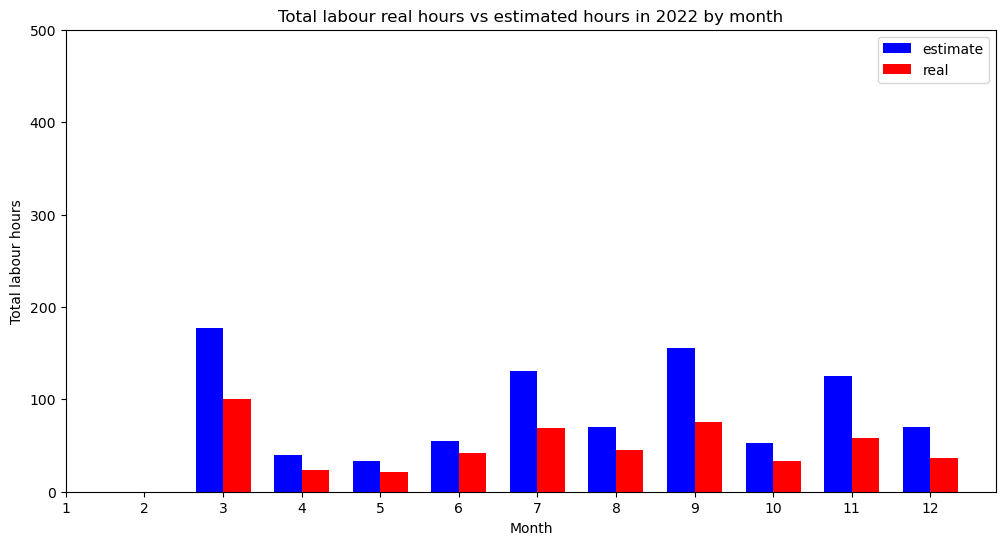

In [84]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_labour_estimate_hours_2022['month'] - bar_width/2, total_labour_estimate_hours_2022['total_labour_estimate_hours'], width=bar_width, color='blue', label='estimate')
plt.bar(total_labour_real_hours_2022['month'] + bar_width/2, total_labour_real_hours_2022['total_labour_real_hours'], width=bar_width, color='red', label='real')

plt.title('Total labour real hours vs estimated hours in 2022 by month')
plt.xlabel('Month')
plt.ylabel('Total labour hours')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)
plt.ylim(top=500)

plt.show()

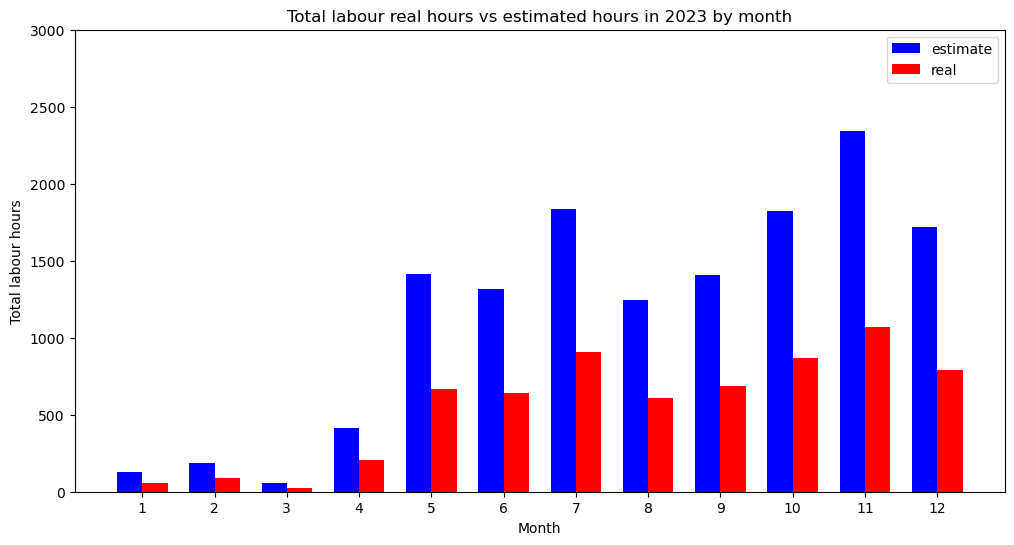

In [85]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(total_labour_estimate_hours_2023['month'] - bar_width/2, total_labour_estimate_hours_2023['total_labour_estimate_hours'], width=bar_width, color='blue', label='estimate')
plt.bar(total_labour_real_hours_2023['month'] + bar_width/2, total_labour_real_hours_2023['total_labour_real_hours'], width=bar_width, color='red', label='real')

plt.title('Total labour real hours vs estimated hours in 2023 by month')
plt.xlabel('Month')
plt.ylabel('Total labour hours')
plt.legend(loc='upper right')

months = total_faturation_2023['month'].unique()
plt.xticks(months)
plt.ylim(top=3000)

plt.show()

##### Total real labour hours per workshop

In [86]:
workshops_labour_hours=data.groupby(['workshop'])['labour_hours'].sum()
workshops_labour_hours_df = pd.DataFrame({'workshop': workshops_labour_hours.index, 'total_labour_hours': workshops_labour_hours.values})


In [87]:
workshops_estimate_labour_hours=data.groupby(['workshop'])['total_labour_estimate_hours'].sum()
workshops_estimate_labour_hours_df = pd.DataFrame({'workshop': workshops_estimate_labour_hours.index, 'total_labour_hours': workshops_estimate_labour_hours.values})


In [88]:
merged_df = pd.merge(workshops_labour_hours_df, workshops_estimate_labour_hours_df, on='workshop', suffixes=('_real', '_estimate'))
merged_df['estimate_real_ratio'] = merged_df['total_labour_hours_estimate'] / merged_df['total_labour_hours_real']
merged_df.round(2)

,workshop,total_labour_hours_real,total_labour_hours_estimate,estimate_real_ratio
0,Carnaxide,5061.16,10844.76,2.14
1,Queluz,2425.95,4736.74,1.95


In Carnaxide, the total time estimates for automobile repairs are, on average, approximately 2.31 times higher than the actual time spent. In other words, the estimates exceed the actual repair time.  
: Regarding Queluz, the value suggests that the total time estimates are, on average, approximately 1.96 times higher than the actual repair time. Similar to Carnaxide, the estimates surpass the actual repair tim  
Both workshops show a tendency to complete repairs in less time than initially estimated, but Carnaxide, with its higher ratio, indicates a higher probability of reducing the repair time compared to Queluz.e.

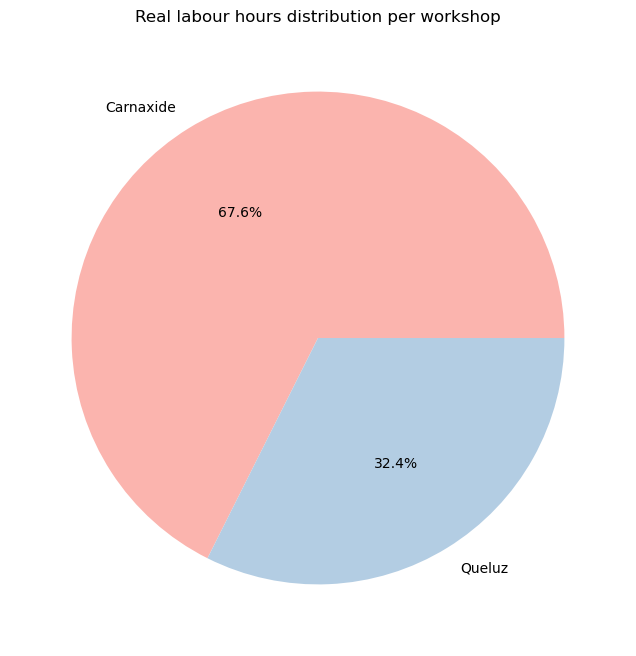

In [89]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_labour_hours.values, labels=workshops_labour_hours.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('Real labour hours distribution per workshop')
plt.show()

#### Car Repairs 

##### Total number of repairs

In [90]:
# '.count()' method was used to count the number of repairs (non-null/missing values).

total_repairs=data['workshop'].count()
total_repairs

996

##### Number of reparations per year

In [91]:
number_repairs_year = data.groupby(['year', 'workshop'])['workshop'].count()
number_repairs_year = pd.DataFrame({'year/workshop': number_repairs_year.index, 'count': number_repairs_year.values})
number_repairs_year

,year/workshop,count
0,"(2022, Carnaxide)",49
1,"(2022, Queluz)",19
2,"(2023, Carnaxide)",595
3,"(2023, Queluz)",282
4,"(2024, Carnaxide)",36
5,"(2024, Queluz)",15


##### Number of reparations per workshops

In [92]:
workshops=data.groupby(['workshop'])['workshop'].count()
workshops_df = pd.DataFrame({'workshop': workshops.index, 'count': workshops.values})
workshops_df

,workshop,count
0,Carnaxide,680
1,Queluz,316


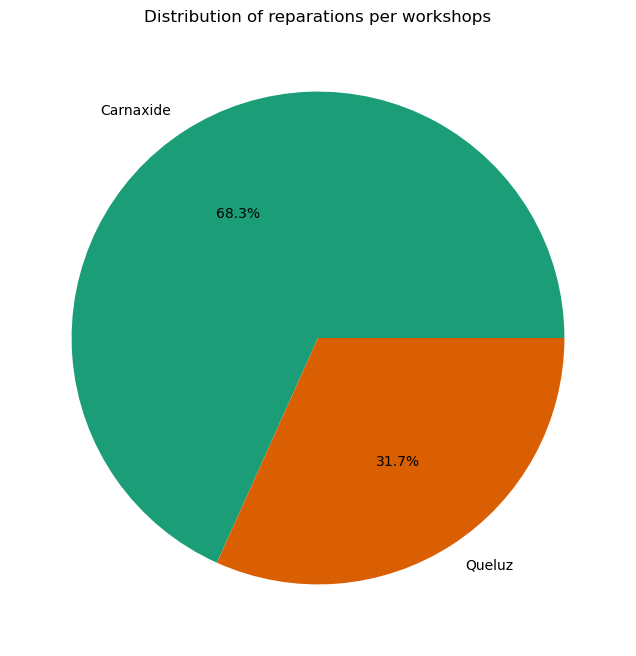

In [93]:
plt.figure(figsize=(10, 8))
plt.pie(workshops.values, labels=workshops.index, autopct='%1.1f%%', colors=plt.cm.Dark2.colors)

plt.title('Distribution of reparations per workshops')
plt.show()

- In total, there were 997 repairs, of which 681 (68%) were carried out in Carnaxide and 316 (32%) in Queluz;
- In 2022, Carnaxide recorded 49 repairs, and Queluz had 19;
- In 2023, Carnaxide totaled 596 repairs, and Queluz had 282;
- In 2024, Carnaxide had 36 repairs, and Queluz had 15.

##### Real labour hours per car reparation ratio in each workshop

In [94]:
labour_ratio_carnaxide= workshops_labour_hours['Carnaxide']/workshops['Carnaxide']
print('Real labour hour ratio Carnaxide:', labour_ratio_carnaxide.round(2))

Real labour hour ratio Carnaxide: 7.44


In [95]:
labour_ratio_queluz= workshops_labour_hours['Queluz']/workshops['Queluz']
print('Real labour hour ratio Queluz:', labour_ratio_queluz.round(2))

Real labour hour ratio Queluz: 7.68


On average, 7.44 hours of actual work are performed per vehicle repair in Carnaxide, and 7.68 hours in Queluz. The 'real labor hour ratio' represents the average of effective working hours per vehicle repair.

##### Total number of towed car repairs

In [96]:
data_towing=data[data['towing_date'].notna()].copy()

In [97]:
data_towing_number = data_towing['id'].count()
data_towing_number

111


In total, 111 cars were towed.

In [98]:
data_towing_workshop = data_towing.groupby(['workshop'])['workshop'].count()
data_towing_workshop_df = pd.DataFrame({'workshop': data_towing_workshop.index, 'count': data_towing_workshop.values})
data_towing_workshop_df

,workshop,count
0,Carnaxide,25
1,Queluz,86


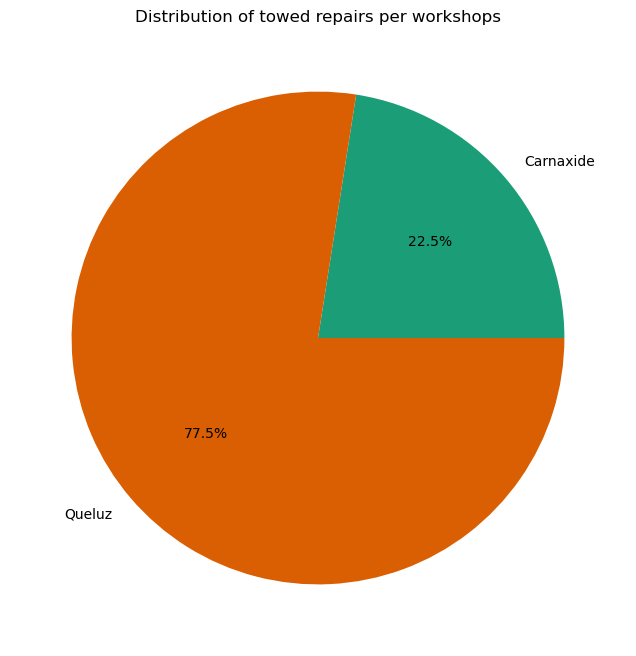

In [99]:
plt.figure(figsize=(10, 8))
plt.pie(data_towing_workshop.values, labels=data_towing_workshop.index, autopct='%1.1f%%', colors=plt.cm.Dark2.colors)

plt.title('Distribution of towed repairs per workshops')
plt.show()

#### Percentage of car repair that were towed by workshop

In [100]:
perc_towed_carnaxide=((data_towing_workshop.Carnaxide/workshops.Carnaxide)*100).round(0)
perc_towed_carnaxide

4.0

In [101]:
perc_towed_queluz=((data_towing_workshop.Queluz/workshops.Queluz)*100).round(0)
perc_towed_queluz

27.0

In [102]:
estimated_towed_ratio_queluz=((data_towing_workshop.Queluz/data_towing_workshop.Carnaxide))
estimated_towed_ratio_queluz

3.44

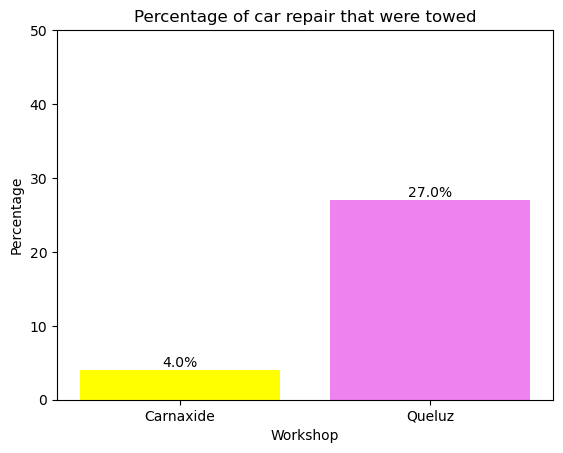

In [103]:
workshopss = ['Carnaxide', 'Queluz']
perc_delays = [perc_towed_carnaxide, perc_towed_queluz]

plt.bar(workshopss, perc_delays, color=['yellow', 'violet'])
plt.title('Percentage of car repair that were towed')
plt.xlabel('Workshop')
plt.ylabel('Percentage')
plt.ylim(0, 50) 
for i, perc in enumerate(perc_delays):
    plt.text(i, perc, f'{perc}%', ha='center', va='bottom')
plt.show()

#### Delays

##### Total delay labour days

In [104]:
total_delay_labour_days=data['days_delay_without_weekends'].sum()
print('Total delay labour days:', total_delay_labour_days)

Total delay labour days: 286


##### Total delay labour days per workshop

In [105]:
workshops_delay_labour_days=data.groupby(['workshop'])['days_delay_without_weekends'].sum()
workshops_delay_labour_days_df = pd.DataFrame({'workshop': workshops_delay_labour_days.index, 'total_labour_hours': workshops_delay_labour_days.values})
workshops_delay_labour_days_df

,workshop,total_labour_hours
0,Carnaxide,137
1,Queluz,149


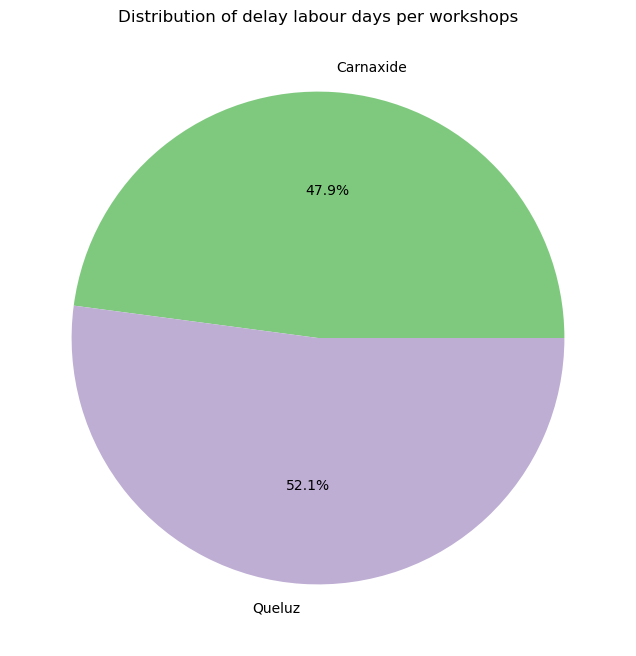

In [106]:
plt.figure(figsize=(10, 8))
plt.pie(workshops_delay_labour_days.values, labels=workshops_delay_labour_days.index, autopct='%1.1f%%', colors=plt.cm.Accent.colors)

plt.title('Distribution of delay labour days per workshops')
plt.show()

137 delay repair days (48%) were recorded in Carnaxide, and 149 delay repair days (52%) in Queluz.

##### Percentage of repairs with delay per workshop

In [107]:
number_delays = data[data['days_delay_without_weekends'] > 0]['days_delay_without_weekends'].count()
print('Number of delays:', number_delays)

Number of delays: 94


In [108]:
number_delays_per_workshop=data[data['days_delay_without_weekends'] > 0].groupby('workshop').size()
number_delays_per_workshop_df=pd.DataFrame({'workshop': number_delays_per_workshop.index, 'number_of_delays_per_workshop': number_delays_per_workshop.values})
number_delays_per_workshop_df

,workshop,number_of_delays_per_workshop
0,Carnaxide,54
1,Queluz,40


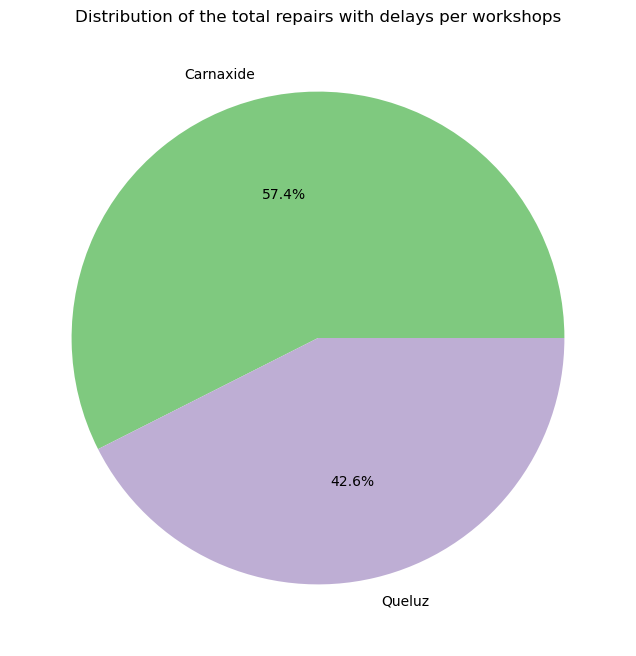

In [109]:
plt.figure(figsize=(10, 8))
plt.pie(number_delays_per_workshop.values, labels=number_delays_per_workshop.index, autopct='%1.1f%%', colors=plt.cm.Accent.colors)

plt.title('Distribution of the total repairs with delays per workshops')
plt.show()

In [110]:
perc_delays_carnaxide=((number_delays_per_workshop.Carnaxide/workshops.Carnaxide)*100).round(0)
perc_delays_carnaxide

8.0

In [111]:
perc_delays_queluz=((number_delays_per_workshop.Queluz/workshops.Queluz)*100).round(0)
perc_delays_queluz

13.0

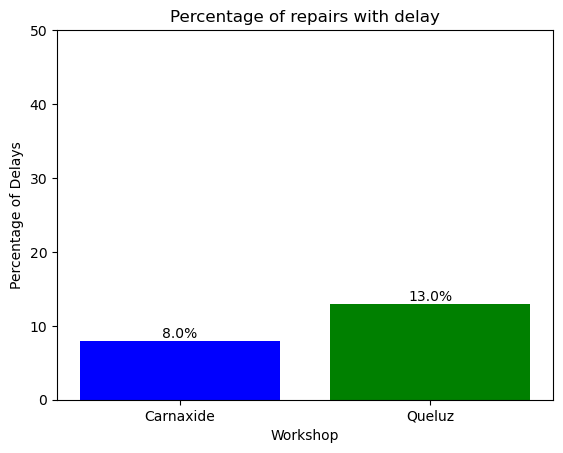

In [112]:
workshopss = ['Carnaxide', 'Queluz']
perc_delays = [perc_delays_carnaxide, perc_delays_queluz]

plt.bar(workshopss, perc_delays, color=['blue', 'green'])
plt.title('Percentage of repairs with delay')
plt.xlabel('Workshop')
plt.ylabel('Percentage of Delays')
plt.ylim(0, 50) 
for i, perc in enumerate(perc_delays):
    plt.text(i, perc, f'{perc}%', ha='center', va='bottom')
plt.show()

This means that 8% and 13% of the vehicles that were repaired in Carnaxide and Queluz, respectively, had delay.

##### Delay labour days ratio by car repair per workshop

In [113]:
delay_ratio_carnaxide= workshops_delay_labour_days['Carnaxide']/workshops['Carnaxide']
print('Labour hour ratio Carnaxide:', delay_ratio_carnaxide.round(2))

Labour hour ratio Carnaxide: 0.2


In [114]:
delay_ratio_queluz= workshops_delay_labour_days['Queluz']/workshops['Queluz']
print('Labour delay ratio Queluz:', delay_ratio_queluz.round(2))

Labour delay ratio Queluz: 0.47


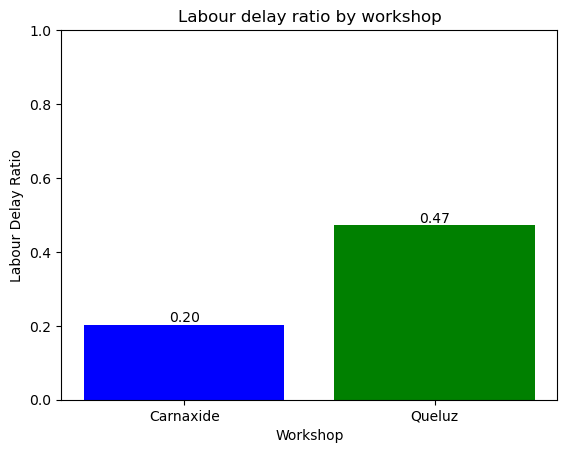

In [115]:
delay_ratios = [delay_ratio_carnaxide, delay_ratio_queluz]

plt.bar(workshopss, delay_ratios, color=['blue', 'green'])
plt.title('Labour delay ratio by workshop')
plt.xlabel('Workshop')
plt.ylabel('Labour Delay Ratio')
plt.ylim(0, 1)
for i, ratio in enumerate(delay_ratios):
    plt.text(i, ratio, f'{ratio:.2f}', ha='center', va='bottom')
plt.show()

This means that, on average, there is a delay of 0.20 and 0.47 days, respectively, for the workshops in Carnaxide and Queluz.

#### Car's duration in the repair shop (days) - only towed cars

##### Between towing date and start repair date

In [116]:
towing_days_workshop = (data_towing['start_repair_date'] - data_towing['towing_date']).dt.days.mean().round(2)
print('Average number of days (weekend included) a towed car remains in the workshop until it starts to be repaired:',towing_days_workshop)

Average number of days (weekend included) a towed car remains in the workshop until it starts to be repaired: 10.8


In [117]:
data_towing['towing_days'] = (data_towing['start_repair_date'] - data_towing['towing_date']).dt.days

data_towing_per_workshop = data_towing.groupby('workshop')['towing_days'].mean().round(2)
towing_per_workshop_df = pd.DataFrame({'workshop': data_towing_per_workshop.index, 'average_towing_days': data_towing_per_workshop.values})
print('Average number of days (weekend included) a towed car remains in the workshop until it starts to be repaired by workshop.')
towing_per_workshop_df

Average number of days (weekend included) a towed car remains in the workshop until it starts to be repaired by workshop.


,workshop,average_towing_days
0,Carnaxide,7.72
1,Queluz,11.70


##### Between towing date and authorization repair date.

In [118]:
towing_days_authorization = (data_towing['repair_authorization_date'] - data_towing['towing_date']).dt.days.mean().round(2)
print('Average number of days a towed car remains in the workshop until repair authorization date:',towing_days_authorization)

Average number of days a towed car remains in the workshop until repair authorization date: 7.47


In [119]:
data_towing['towing_days_authorization'] = (data_towing['repair_authorization_date'] - data_towing['towing_date']).dt.days

towing_days_authorization_workshop = data_towing.groupby('workshop')['towing_days_authorization'].mean().round(2)
towing_days_authorization_workshop_df = pd.DataFrame({'workshop': towing_days_authorization_workshop.index, 'towing_days_authorization_workshops': towing_days_authorization_workshop.values})
print('Average number of days (weekend included) a towed car remains in the workshop until repair authorization date by workshop.')
towing_days_authorization_workshop_df

Average number of days (weekend included) a towed car remains in the workshop until repair authorization date by workshop.


,workshop,towing_days_authorization_workshops
0,Carnaxide,1.48
1,Queluz,9.21


The repair authorization in Queluz takes significantly longer time (six times more) to be approved than in comparison to Carnaxide.

##### Between repair authorization date and repair scheduling date in towed cars.

In [120]:
authorization_scheduling_days_towing = (data_towing['repair_scheduling_date'] - data_towing['repair_authorization_date']).dt.days.mean().round(2)
print('Average days (weekend included) between repair authorization date and repair scheduling date of a towed car:',authorization_scheduling_days_towing)

Average days (weekend included) between repair authorization date and repair scheduling date of a towed car: 3.49


In [121]:
data_towing['authorization_scheduling_days_towing'] = (data_towing['repair_scheduling_date'] - data_towing['repair_authorization_date']).dt.days
authorization_scheduling_days_towing_workshop = data_towing.groupby('workshop')['authorization_scheduling_days_towing'].mean().round(2)
authorization_scheduling_days_towing_workshop_df = pd.DataFrame({'workshop': authorization_scheduling_days_towing_workshop.index, 'average_authorization_scheduling_days_towing': authorization_scheduling_days_towing_workshop.values})
authorization_scheduling_days_towing_workshop_df

,workshop,average_authorization_scheduling_days_towing
0,Carnaxide,6.12
1,Queluz,2.72


In the other hand, after the repair authorization is approved, the average difference in days until the repair gets start is smaller in Queluz than in Carnaxide (2 times smaller).

#### Car's duration in the repair shop (days) - all cars

##### Between start repair date and end repair date.

In [122]:
reparation_days = (data['end_repair_date'] - data['start_repair_date']).dt.days.mean().round(2)
print('Average days (weekend included) of car reparation:',reparation_days)

Average days (weekend included) of car reparation: 3.32


The average time to repair a car is between 3 and 3,5 days (weekend included). This average value is lower than the average expected repair time (4,5 days - not weekend included).  
This suggests that the actual average repair time may be even less than 3.3 days.

In [123]:
data['reparation_days'] = (data['end_repair_date'] - data['start_repair_date']).dt.days
reparation_days_workshop = data.groupby('workshop')['reparation_days'].mean().round(2)
reparation_days_workshop_df = pd.DataFrame({'workshop': reparation_days_workshop.index, 'average_reparation_days': reparation_days_workshop.values})
reparation_days_workshop_df

,workshop,average_reparation_days
0,Carnaxide,2.72
1,Queluz,4.60


Analyzing each workshop individually, it is noticeable that the repair time at the Carnaxide workshop is significantly below the expected average repair time (4,5 days). On the other hand, in the case of the Queluz workshop, the opposite occurs. In this situation, the average repair time is slightly above the expected average repair time.

##### Between repair authorization date and repair scheduling date.

In [124]:
authorization_scheduling_days = (data['repair_scheduling_date'] - data['repair_authorization_date']).dt.days.mean().round(2)
print('Average days (weekend included) between repair authorization date and repair scheduling date:',authorization_scheduling_days)

Average days (weekend included) between repair authorization date and repair scheduling date: 23.57


In [125]:
data['authorization_scheduling_days'] = (data['repair_scheduling_date'] - data['repair_authorization_date']).dt.days
authorization_scheduling_days_workshop = data.groupby('workshop')['authorization_scheduling_days'].mean().round(2)
authorization_scheduling_days_workshop_df = pd.DataFrame({'workshop': authorization_scheduling_days_workshop.index, 'average_authorization_scheduling_days': authorization_scheduling_days_workshop.values})
print('Average days (weekend included) between repair authorization date and repair scheduling date by workshop.')
authorization_scheduling_days_workshop_df

Average days (weekend included) between repair authorization date and repair scheduling date by workshop.


,workshop,average_authorization_scheduling_days
0,Carnaxide,26.35
1,Queluz,17.59


The difference between the repair authorization date and the repair scheduling date is much higher in cars that were not towed when compared to towed cars (3.5 days average), suggesting that towed cars are prioritized in this aspect.

##### Between repair authorization date and start repair date.

In [126]:
authorization_start_days = (data['start_repair_date'] - data['repair_authorization_date']).dt.days.mean().round(2)
print('Average days (weekend included) between repair authorization date and start repair date:',authorization_start_days)

Average days (weekend included) between repair authorization date and start repair date: 23.56


In [127]:
data['authorization_start_days'] = (data['start_repair_date'] - data['repair_authorization_date']).dt.days
authorization_start_days_workshop = data.groupby('workshop')['authorization_start_days'].mean().round(2)
authorization_start_days_workshop_df = pd.DataFrame({'workshop': authorization_start_days_workshop.index, 'average_authorization_start_days': authorization_start_days_workshop.values})
print('Average days (weekend included) between repair authorization date and start repair date by Workshop.')
authorization_start_days_workshop_df

Average days (weekend included) between repair authorization date and start repair date by Workshop.


,workshop,average_authorization_start_days
0,Carnaxide,26.37
1,Queluz,17.50


##### Between repair authorization date and end repair date.

In [128]:
authorization_end_days = (data['end_repair_date'] - data['repair_authorization_date']).dt.days.mean().round(2)
print('Average days (weekend included) between repair authorization date and end repair date:',authorization_end_days)

Average days (weekend included) between repair authorization date and end repair date: 26.87


In [129]:
data['authorization_end_days'] = (data['end_repair_date'] - data['repair_authorization_date']).dt.days
authorization_end_days_workshop = data.groupby('workshop')['authorization_end_days'].mean().round(2)
authorization_end_days_workshop_df = pd.DataFrame({'workshop': authorization_end_days_workshop.index, 'average_authorization_end_days': authorization_end_days_workshop.values})
print('Average days (weekend included) between repair authorization date and end repair date by Workshop.')
authorization_end_days_workshop_df

Average days (weekend included) between repair authorization date and end repair date by Workshop.


,workshop,average_authorization_end_days
0,Carnaxide,29.09
1,Queluz,22.10


##### Between repair scheduling date and start repair date.

In [130]:
scheduling_start_days_mean = (data['start_repair_date'] - data['repair_scheduling_date']).dt.days.mean().round(2)
print('Average days (weekend included) between repair scheduling date and start repair date:',scheduling_start_days_mean)

Average days (weekend included) between repair scheduling date and start repair date: -0.01


In [131]:
data['scheduling_start_days'] = (data['start_repair_date'] - data['repair_scheduling_date']).dt.days
scheduling_start_days_workshop = data.groupby('workshop')['scheduling_start_days'].mean().round(2)
scheduling_start_days_workshop_df = pd.DataFrame({'workshop': scheduling_start_days_workshop.index, 'average_ascheduling_start_days': scheduling_start_days_workshop.values})
print('Average days (weekend included) between repair scheduling date and start repair date by Workshop.')
scheduling_start_days_workshop_df

Average days (weekend included) between repair scheduling date and start repair date by Workshop.


,workshop,average_ascheduling_start_days
0,Carnaxide,0.02
1,Queluz,-0.09


This information suggests that, on average, repairs start as scheduled. In the case of Queluz, repairs tend to start slightly ahead of schedule.

#### Reparations start

##### Number of reparation started before schedule

In [132]:
repairs_before_scheduling= (data['scheduling_start_days'] < 0).sum()
print('Number of reparation started before schedule:', repairs_before_scheduling)

Number of reparation started before schedule: 13


In [133]:
repairs_before_scheduling_workshop= data[data['scheduling_start_days'] < 0].groupby('workshop').size()
repairs_before_scheduling_workshop_df=pd.DataFrame({'workshop': repairs_before_scheduling_workshop.index, 'repairs_before_scheduling_workshop': repairs_before_scheduling_workshop.values})
repairs_before_scheduling_workshop_df

,workshop,repairs_before_scheduling_workshop
0,Carnaxide,2
1,Queluz,11


##### Number of repairs started before schedule but still delays.

In [134]:
repairs_before_scheduling_with_delay_workshop= data[(data['scheduling_start_days'] < 0) & (data['days_delay_without_weekends'] > 0)].groupby('workshop').size()
repairs_before_scheduling_with_delay_workshop_df=pd.DataFrame({'workshop': repairs_before_scheduling_with_delay_workshop.index, 'repairs_before_scheduling_workshop': repairs_before_scheduling_with_delay_workshop.values})
repairs_before_scheduling_with_delay_workshop_df

,workshop,repairs_before_scheduling_workshop
0,Queluz,1


##### Number of reparation started after schedule

In [135]:
repairs_after_scheduling= (data['scheduling_start_days'] > 0).sum()
print('Number of reparation started after schedule:', repairs_after_scheduling)

Number of reparation started after schedule: 16


In [136]:
repairs_after_scheduling_workshop= data[data['scheduling_start_days'] > 0].groupby('workshop').size()
repairs_after_scheduling_workshop_df=pd.DataFrame({'workshop': repairs_after_scheduling_workshop.index, 'repairs_after_scheduling_workshop': repairs_after_scheduling_workshop.values})
repairs_after_scheduling_workshop_df

,workshop,repairs_after_scheduling_workshop
0,Carnaxide,12
1,Queluz,4


##### Number of repairs started after schedule with delays.

In [137]:
repairs_after_scheduling_with_delay_count = data[(data['scheduling_start_days'] > 0) & (data['days_delay_without_weekends'] > 0)].shape[0]
print('Number of reparations started after schedule with delay:', repairs_after_scheduling_with_delay_count)

Number of reparations started after schedule with delay: 3


In [138]:
repairs_after_scheduling_with_delay_workshop= data[(data['scheduling_start_days'] > 0) & (data['days_delay_without_weekends'] > 0)].groupby('workshop').size()
repairs_after_scheduling_with_delay_workshop_df=pd.DataFrame({'workshop': repairs_after_scheduling_with_delay_workshop.index, 'repairs_after_scheduling_with_delay_workshop': repairs_after_scheduling_with_delay_workshop.values})
repairs_after_scheduling_with_delay_workshop_df

,workshop,repairs_after_scheduling_with_delay_workshop
0,Carnaxide,1
1,Queluz,2


Observations indicate that repairs starting after the scheduled time have a relatively higher probability of resulting in delays, with a count of 3 cases in this category. However, it is crucial to note that this factor is not highly significant, as delays were also observed in situations where the repair started before the scheduled time, with only 1 case in this category. This analysis suggests that the initiation time of repairs is not the determining factor for delays, indicating the influence of other factors in the process.

##### Number of reparation started at schedule

In [139]:
repairs_scheduling= (data['scheduling_start_days'] == 0).sum()
print('Number of reparation started at schedule:', repairs_scheduling)

Number of reparation started at schedule: 967


##### Distribution of the real repair start date (before the scheduled date, on the scheduled date, after the scheduled date)

In [140]:
#def add_weekdays(start_date, num_days):
 #   current_date = start_date
  #  while num_days > 1:
   #     current_date += timedelta(days=1)
    #    if current_date.weekday() < 5:  # Check if it is a business day (Monday to Friday).
     #       num_days -= 1
    #return current_date

In [141]:
#data['expected_end_date_repair'] = data.apply(lambda row: add_weekdays(row['repair_scheduling_date'], row['repair_time']), axis=1)

In [142]:
#data['days_difference_expected_vs_real']= (data['end_repair_date'] - data['expected_end_date_repair']).dt.days

### Brands

#### Top15 car brand with most reparations

In [143]:
car_most_reparations = data.groupby(['brand'])['brand'].count()
car_most_reparations = car_most_reparations.sort_values(ascending=True).tail(15)
car_most_reparations = car_most_reparations.head(15)

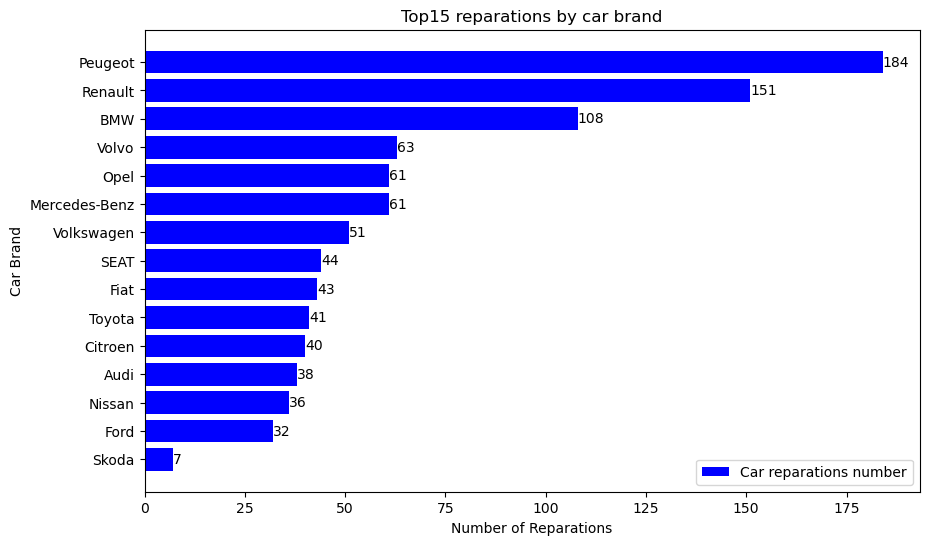

In [144]:
plt.figure(figsize=(10, 6))

plt.barh(car_most_reparations.index, car_most_reparations.values, color='blue', label='Car reparations number')

plt.title('Top15 reparations by car brand')
plt.xlabel('Number of Reparations')
plt.ylabel('Car Brand')

for i, v in enumerate(car_most_reparations):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### Top15 car brand with less reparations

In [145]:
car_less_reparations = data.groupby(['brand'])['brand'].count()
car_less_reparations = car_less_reparations.sort_values(ascending=False)
car_less_reparations = car_less_reparations.tail(15)

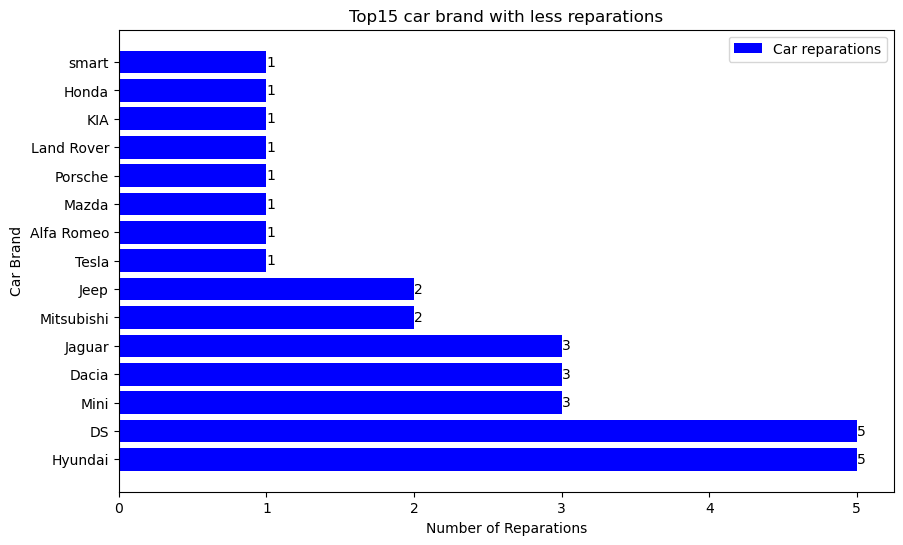

In [146]:
plt.figure(figsize=(10, 6))

plt.barh(car_less_reparations.index, car_less_reparations.values, color='blue', label='Car reparations')

plt.title('Top15 car brand with less reparations')
plt.xlabel('Number of Reparations')
plt.ylabel('Car Brand')

for i, v in enumerate(car_less_reparations):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='upper right')

plt.show()

#### Top15 car brands with most faturation

In [147]:
car_data_faturation = data.groupby(['brand'])['total_faturation_estimate(€)'].sum()
car_data_faturation = car_data_faturation.sort_values(ascending=True).tail(15)
car_data_faturation=car_data_faturation.head(15)

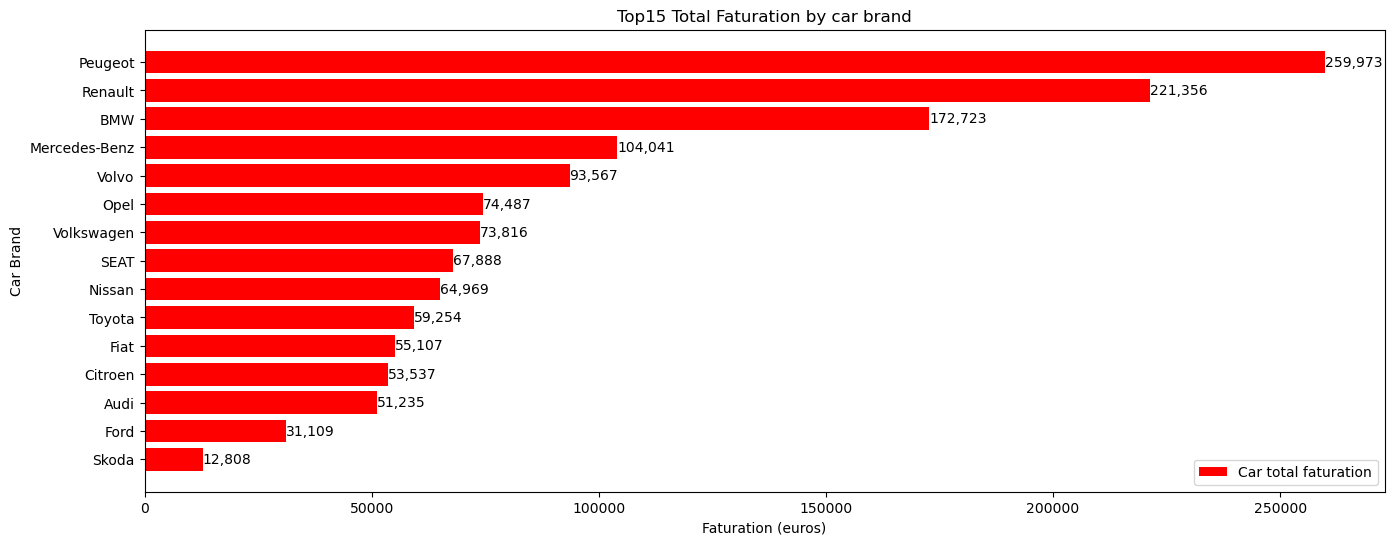

In [148]:
plt.figure(figsize=(16, 6))

plt.barh(car_data_faturation.index, car_data_faturation.values, color='red', label='Car total faturation')

plt.title('Top15 Total Faturation by car brand')
plt.xlabel('Faturation (euros)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_faturation):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [149]:
car_data_faturation_perc= (car_data_faturation/total_faturation)*100
car_data_faturation_perc= car_data_faturation_perc.fillna(0).sort_values()

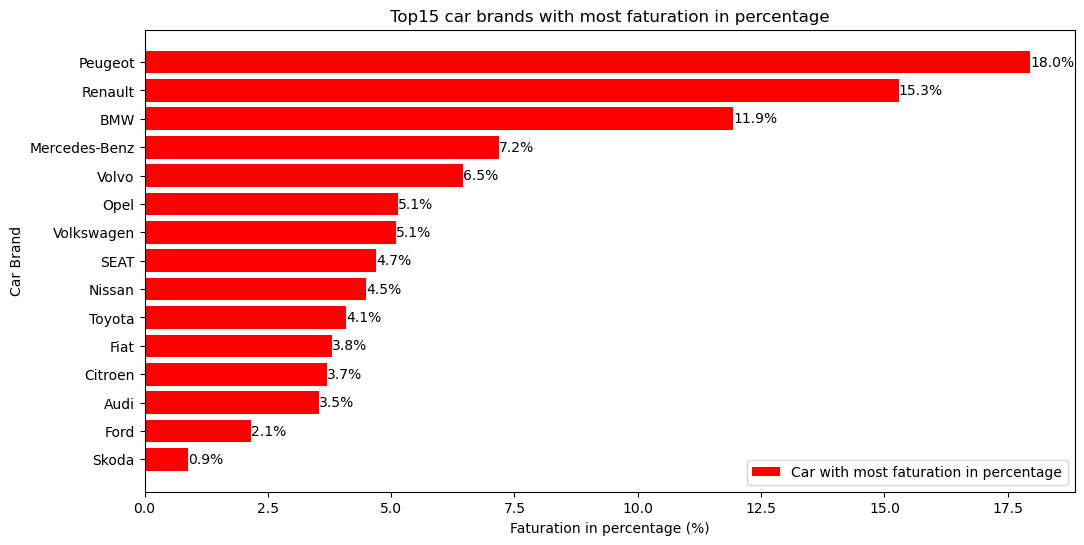

In [150]:
plt.figure(figsize=(12, 6))

plt.barh(car_data_faturation_perc.index, car_data_faturation_perc.values, color='red', label='Car with most faturation in percentage')

plt.title('Top15 car brands with most faturation in percentage')
plt.xlabel('Faturation in percentage (%)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_faturation_perc):
    plt.text(v, i, f'{v:,.1f}%', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [151]:
car_faturation_ratio_per_repair= (car_data_faturation/car_most_reparations)
car_faturation_ratio_per_repair= car_faturation_ratio_per_repair.fillna(0).sort_values()

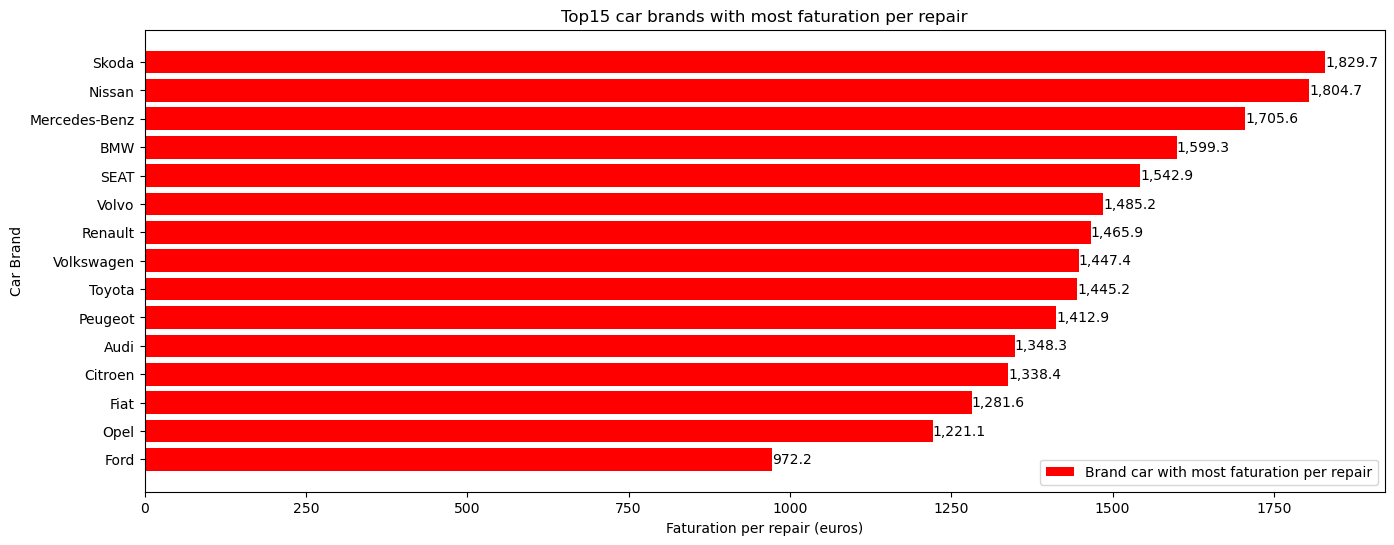

In [152]:
plt.figure(figsize=(16, 6))

plt.barh(car_faturation_ratio_per_repair.index, car_faturation_ratio_per_repair.values, color='red', label='Brand car with most faturation per repair')

plt.title('Top15 car brands with most faturation per repair')
plt.xlabel('Faturation per repair (euros)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_faturation_ratio_per_repair):
    plt.text(v, i, f'{v:,.1f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### Top15 car brands with most parts faturation

In [153]:
car_data_parts_faturation = data.groupby(['brand'])['parts_estimate(€)'].sum()
car_data_parts_faturation = car_data_parts_faturation.sort_values(ascending=True).tail(15)
car_data_parts_faturation= car_data_parts_faturation.head(15)

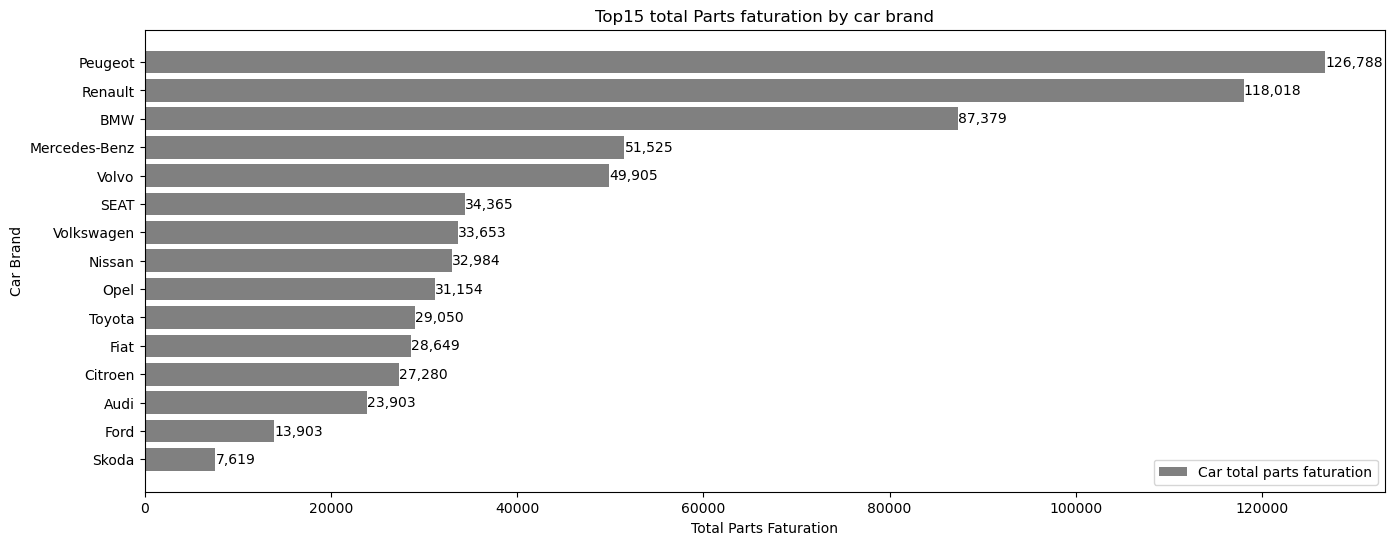

In [154]:
plt.figure(figsize=(16, 6))

plt.barh(car_data_parts_faturation.index, car_data_parts_faturation.values, color='grey', label='Car total parts faturation')

plt.title('Top15 total Parts faturation by car brand')
plt.xlabel('Total Parts Faturation')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_parts_faturation):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [155]:
car_data_parts_faturation_perc= (car_data_parts_faturation/total_parts_faturation)*100
car_data_parts_faturation_perc= car_data_parts_faturation_perc.fillna(0).sort_values()

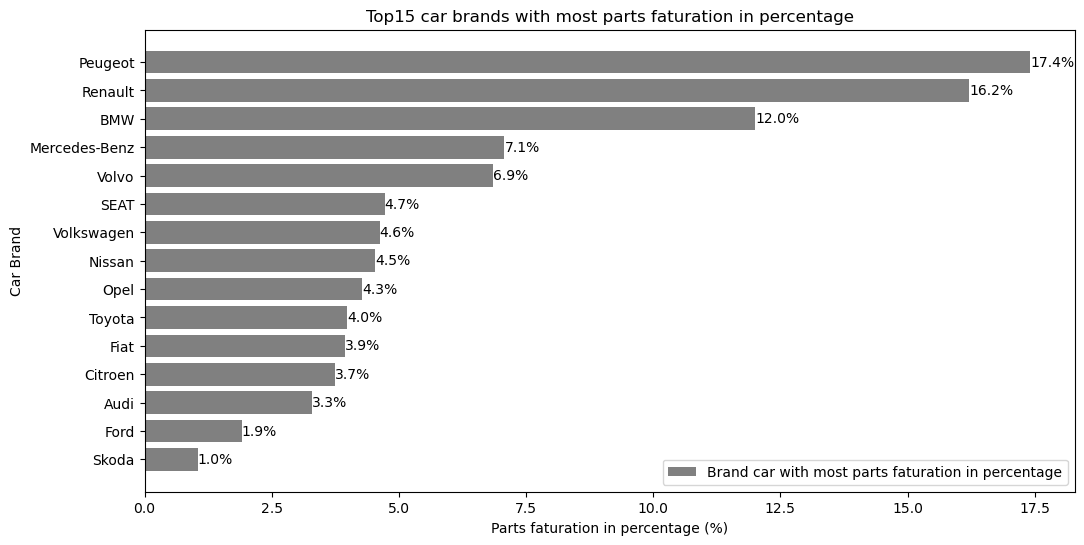

In [156]:
plt.figure(figsize=(12, 6))

plt.barh(car_data_parts_faturation_perc.index, car_data_parts_faturation_perc.values, color='grey', label='Brand car with most parts faturation in percentage')

plt.title('Top15 car brands with most parts faturation in percentage')
plt.xlabel('Parts faturation in percentage (%)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_parts_faturation_perc):
    plt.text(v, i, f'{v:,.1f}%', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [157]:
car_data_parts_faturation_ratio= (car_data_parts_faturation/car_most_reparations)
car_data_parts_faturation_ratio= car_data_parts_faturation_ratio.fillna(0).sort_values().round()

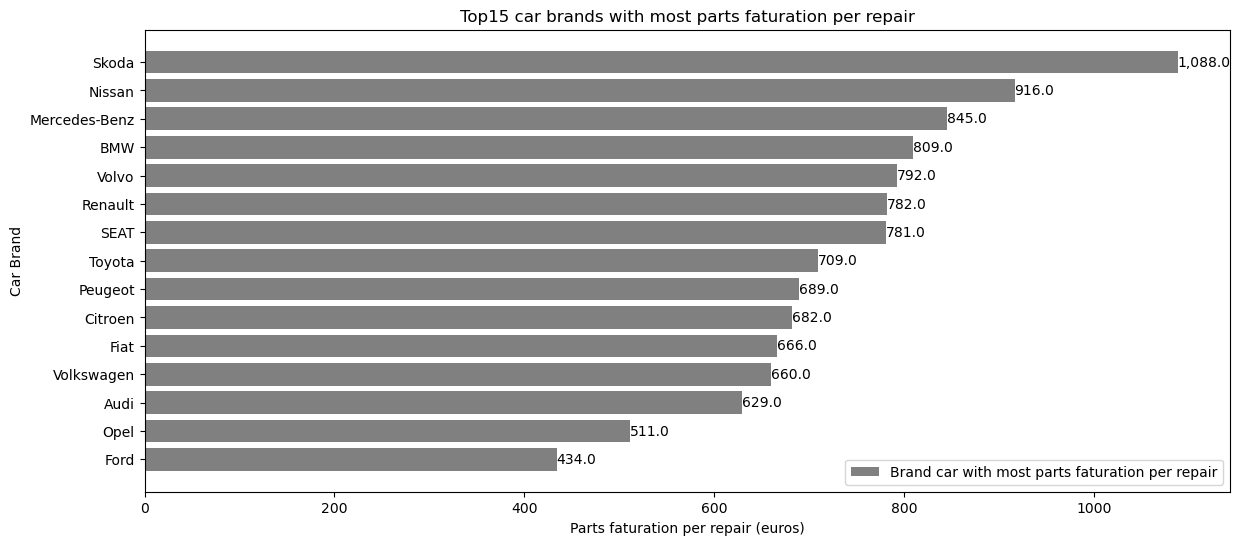

In [158]:
plt.figure(figsize=(14, 6))

plt.barh(car_data_parts_faturation_ratio.index, car_data_parts_faturation_ratio.values, color='grey', label='Brand car with most parts faturation per repair')

plt.title('Top15 car brands with most parts faturation per repair')
plt.xlabel('Parts faturation per repair (euros)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_parts_faturation_ratio):
    plt.text(v, i, f'{v:,.1f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### Top15 car brands with most labour faturation

In [159]:
car_labour_faturation = data.groupby(['brand'])['total_labour_faturation_estimate(€)'].sum()
car_labour_faturation = car_labour_faturation.sort_values(ascending=True).tail(15)
car_labour_faturation = car_labour_faturation.head(15)

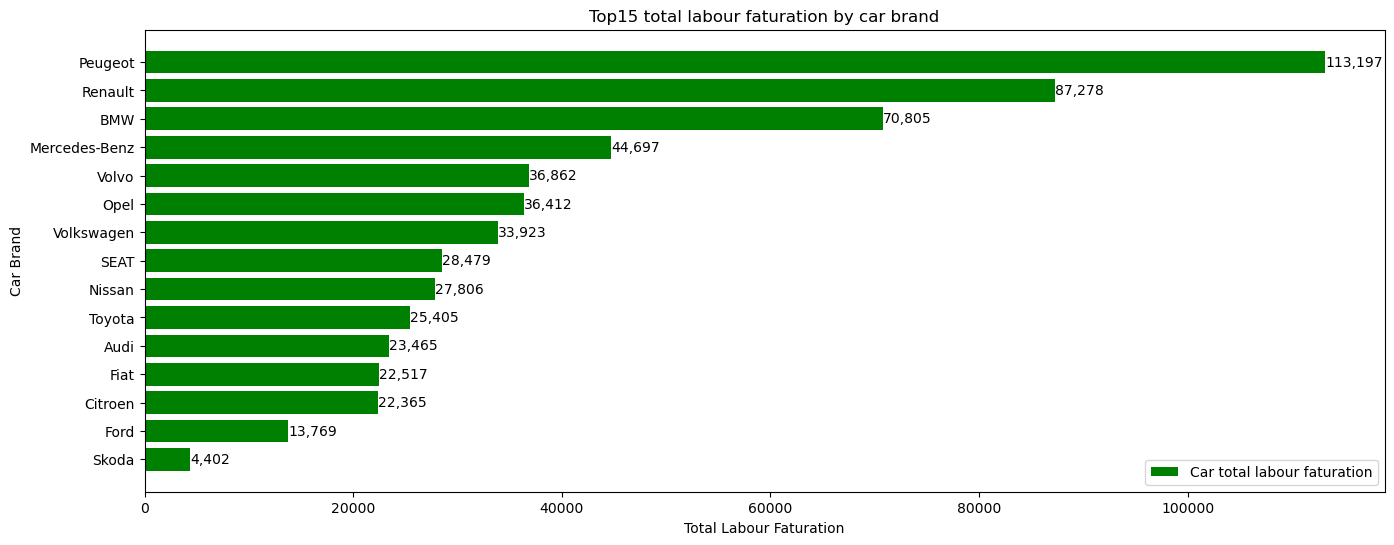

In [160]:
plt.figure(figsize=(16, 6))

plt.barh(car_labour_faturation.index, car_labour_faturation.values, color='green', label='Car total labour faturation')

plt.title('Top15 total labour faturation by car brand')
plt.xlabel('Total Labour Faturation')
plt.ylabel('Car Brand')

for i, v in enumerate(car_labour_faturation):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [161]:
car_labour_faturation_perc= (car_labour_faturation/total_labour_faturation)*100
car_labour_faturation_perc= car_labour_faturation_perc.fillna(0).sort_values()

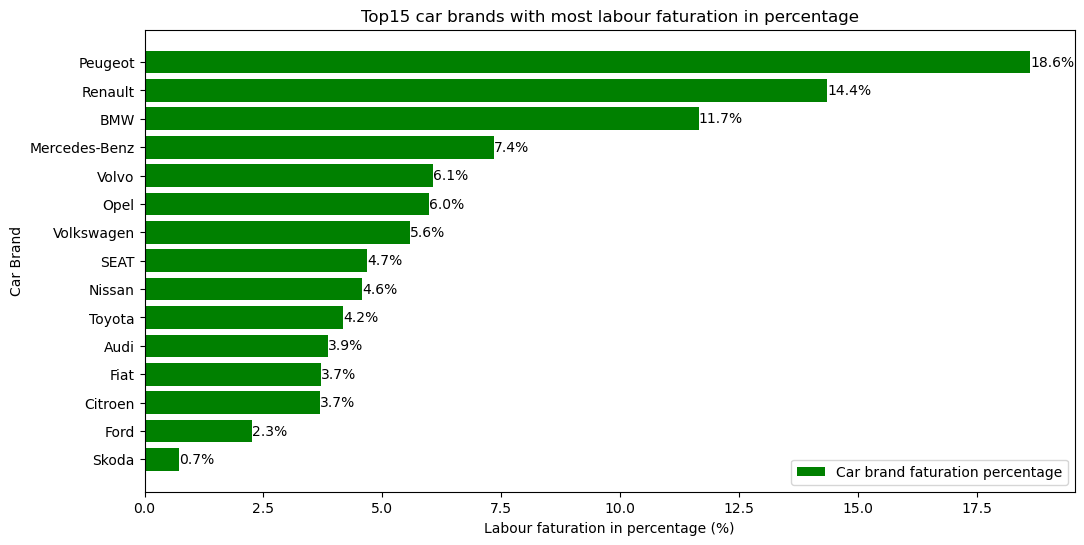

In [162]:
plt.figure(figsize=(12, 6))

plt.barh(car_labour_faturation_perc.index, car_labour_faturation_perc.values, color='green', label='Car brand faturation percentage')

plt.title('Top15 car brands with most labour faturation in percentage')
plt.xlabel('Labour faturation in percentage (%)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_labour_faturation_perc):
    plt.text(v, i, f'{v:,.1f}%', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [163]:
car_labour_faturation_ratio= (car_labour_faturation/car_most_reparations)
car_labour_faturation_ratio= car_labour_faturation_ratio.fillna(0).sort_values().round()

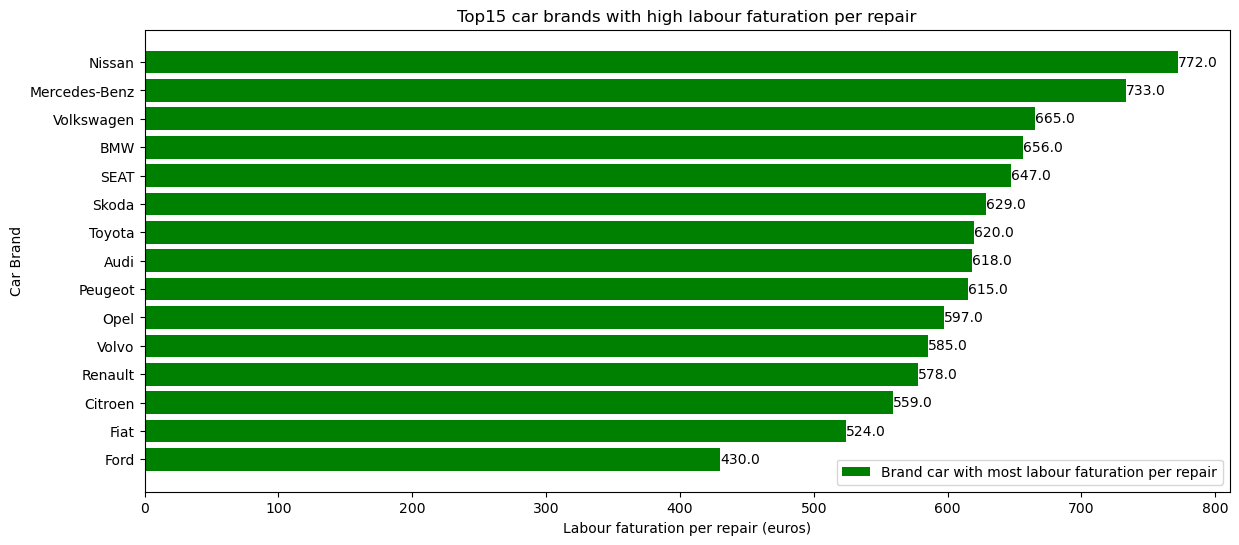

In [164]:
plt.figure(figsize=(14, 6))

plt.barh(car_labour_faturation_ratio.index, car_labour_faturation_ratio.values, color='green', label='Brand car with most labour faturation per repair')

plt.title('Top15 car brands with high labour faturation per repair')
plt.xlabel('Labour faturation per repair (euros)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_labour_faturation_ratio):
    plt.text(v, i, f'{v:,.1f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### Car brands with most repair delays

In [165]:
car_data_delay = data[data['days_delay_without_weekends'] > 0].groupby('brand').size().sort_values().tail(20)

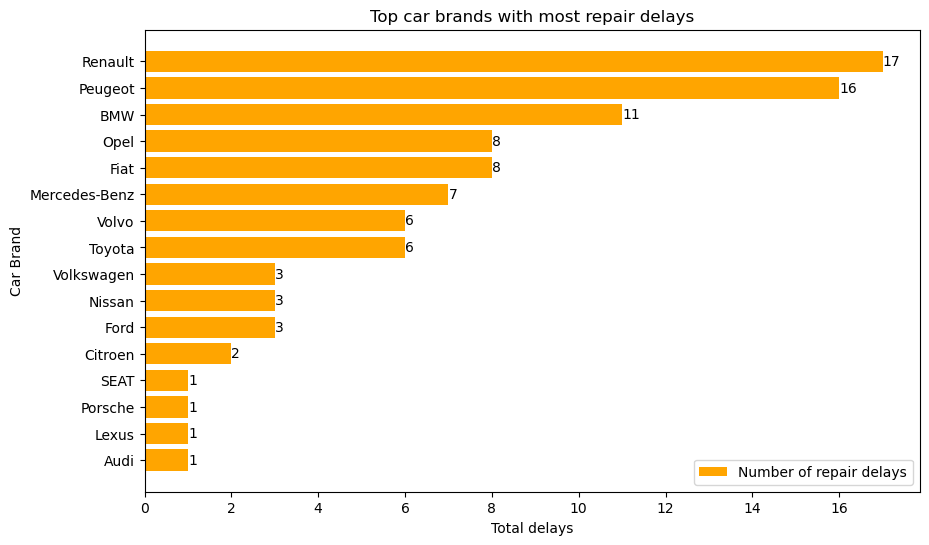

In [166]:
plt.figure(figsize=(10, 6))

plt.barh(car_data_delay.index, car_data_delay.values, color='orange', label='Number of repair delays')

plt.title('Top car brands with most repair delays')
plt.xlabel('Total delays')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_delay):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [167]:
car_delay_perc= (car_data_delay/number_delays)*100
car_delay_perc= car_delay_perc.fillna(0).sort_values()

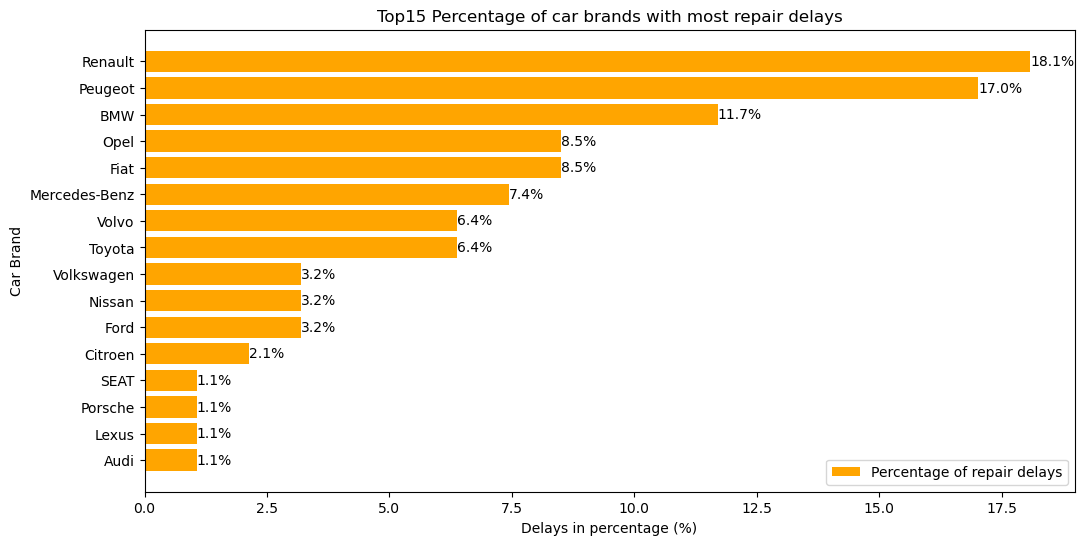

In [168]:
plt.figure(figsize=(12, 6))

plt.barh(car_delay_perc.index, car_delay_perc.values, color='orange', label='Percentage of repair delays')

plt.title('Top15 Percentage of car brands with most repair delays')
plt.xlabel('Delays in percentage (%)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_delay_perc):
    plt.text(v, i, f'{v:,.1f}%', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

In [169]:
car_most_reparations_2 = data.groupby(['brand'])['brand'].count()
car_most_reparations_2 = car_most_reparations_2.sort_values(ascending=True).tail(20)

In [170]:
car_data_delay_ratio= (car_data_delay/car_most_reparations_2)*100
car_data_delay_ratio= car_data_delay_ratio.dropna().sort_values()
car_data_delay_ratio=car_data_delay_ratio.drop('Lexus', errors='ignore') 

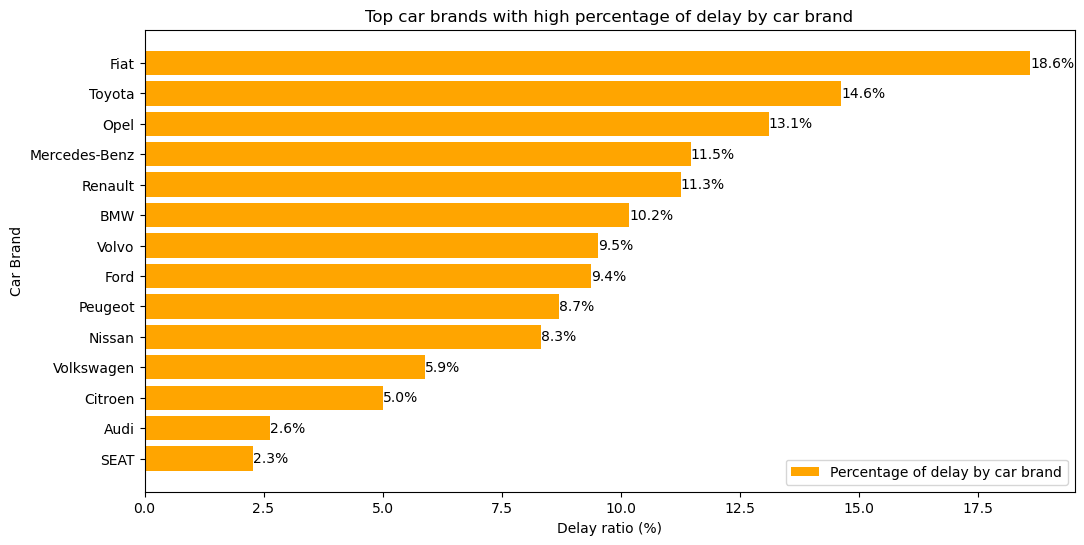

In [171]:
plt.figure(figsize=(12, 6))

plt.barh(car_data_delay_ratio.index, car_data_delay_ratio.values, color='orange', label='Percentage of delay by car brand')

plt.title('Top car brands with high percentage of delay by car brand')
plt.xlabel('Delay ratio (%)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_delay_ratio):
    plt.text(v, i, f'{v:,.1f}%', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

Initially, the Lexus brand was also included, however, there was a limited number of repair cases for the Lexus, with only 5 instances. Due to the small sample size and to avoid potential distortions in the average days of delays by car brand, I identified it as an 'outlier' and excluded the Lexus data from the 'Car brands with most repair delays' graphs. This ensures a more accurate representation of the overall trends in delay averages.

#### Average days of delays by car brand

In [172]:
car_data_delay = data.groupby('brand')['days_delay_without_weekends'].mean().sort_values()
car_data_delay = car_data_delay[car_data_delay > 0]
car_data_delay = car_data_delay.drop(['Porsche', 'Lexus'], errors='ignore') 

There was a unique repair case for a Porsche vehicle, which experienced an unusual delay of 5 days. Considering that there is only one instance of repair for this brand and the significant delay, I identified it as an outlier. To ensure a more accurate representation of average delays by car brand, I excluded this outlier from the 'Average days of delays by car brand' graph. Also, removed Lexus for the same reasons explained above in 'Car brands with most repair delays'.

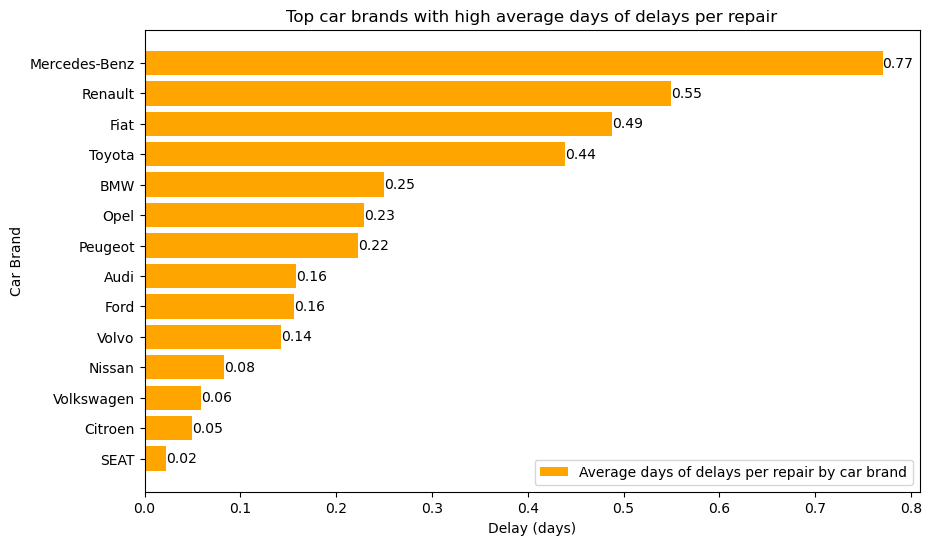

In [173]:
plt.figure(figsize=(10, 6))

plt.barh(car_data_delay.index, car_data_delay.values, color='orange', label='Average days of delays per repair by car brand')

plt.title('Top car brands with high average days of delays per repair')
plt.xlabel('Delay (days)')
plt.ylabel('Car Brand')

for i, v in enumerate(car_data_delay):
    plt.text(v, i, f'{v:,.2f}', color='black', va='center')

plt.legend(loc='lower right')

plt.show()

#### Predictive Model - Classification with Logistic Regression

The objective of the predictive model is to determine whether a new repair will have a delay or not (class 1 and class 0, respectively).

##### Numeric variables distribution visualization

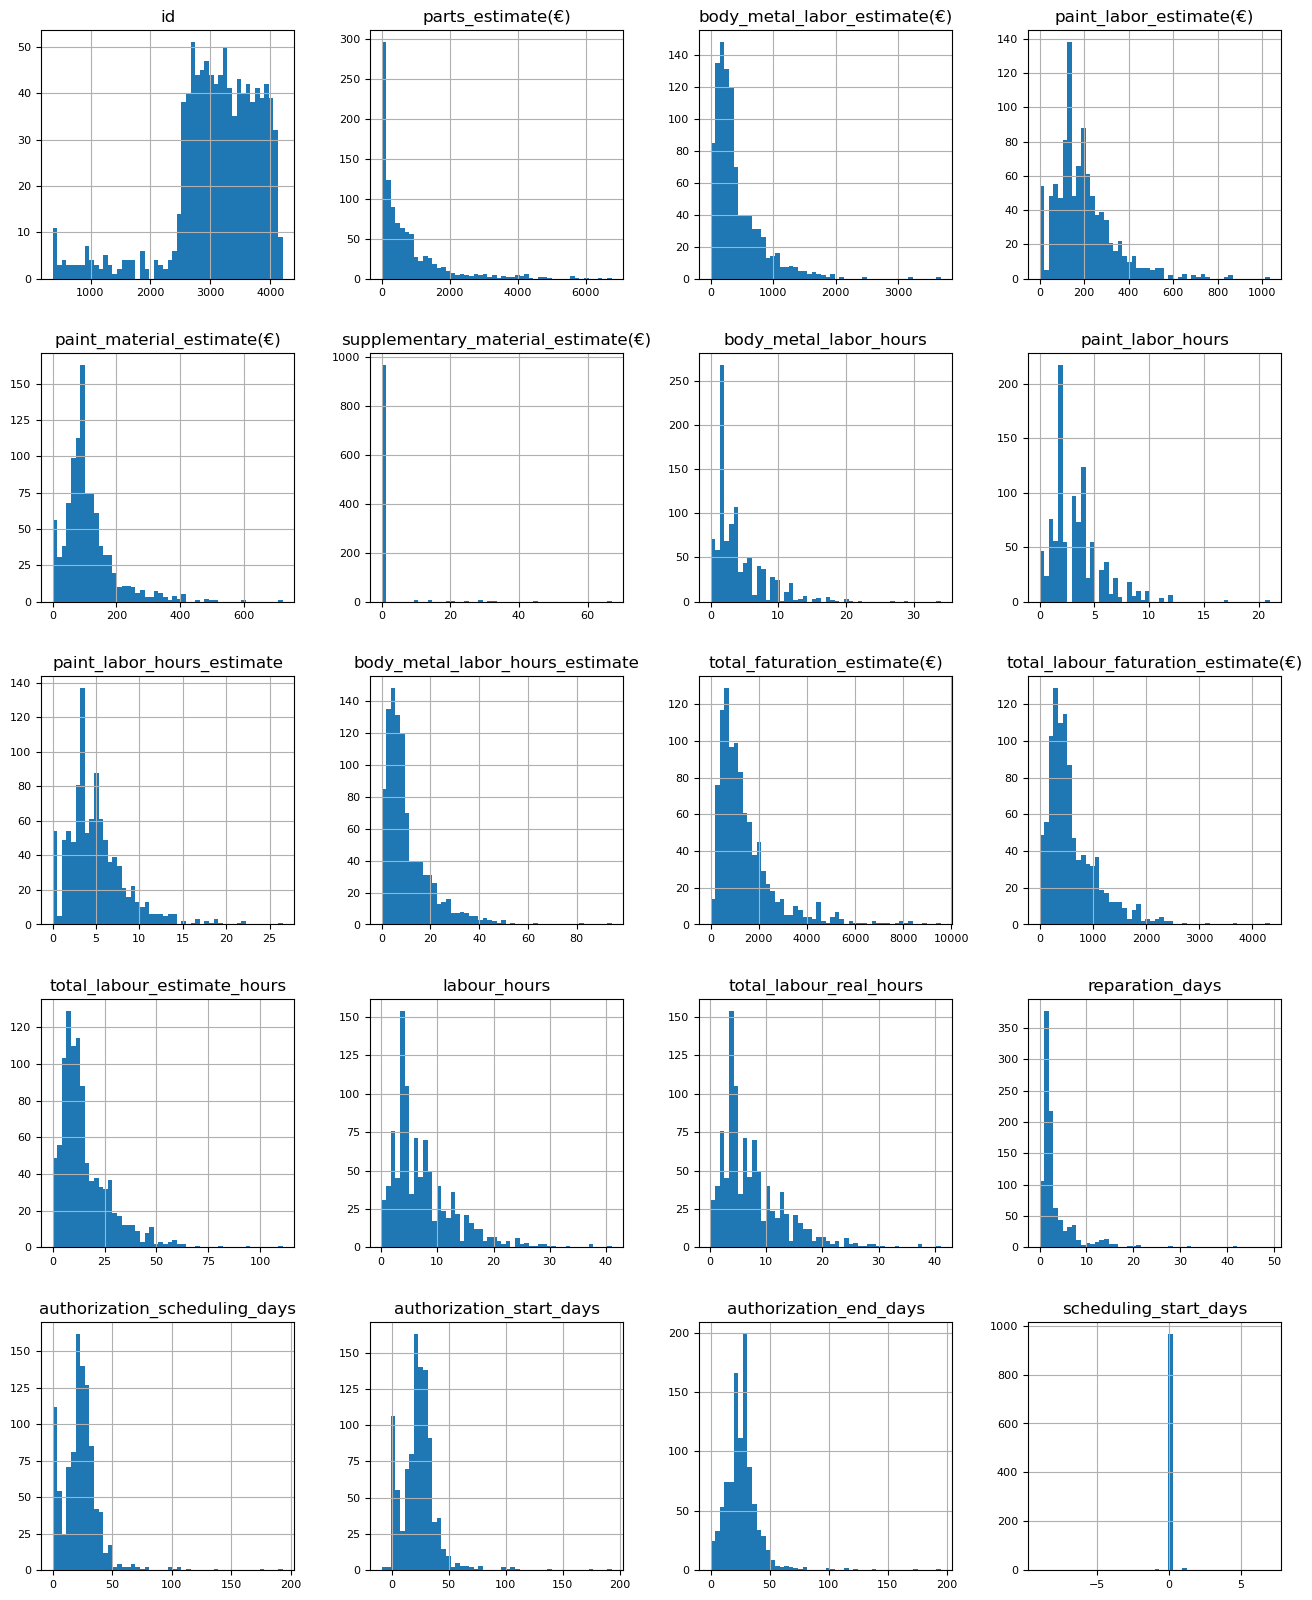

In [174]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

The previous histograms aim to visualize the distribution of numeric data in each column of the DataFrame, offering valuable insights for building a predictive logistic regression model. By selecting numeric variables and creating histograms, the code enables the identification of dispersion patterns and asymmetries. This exploratory analysis is essential for understanding the characteristics of the variables, recognizing potential transformations, and ensuring the robustness of the logistic regression model. The visualization assists in making informed decisions during the modeling process, providing a comprehensive view of data distribution and patterns that contribute to model accuracy.

In [175]:
data_model=data.drop(['id', 'kms', 'creation_date', 'model', 'appraisal_date', 'repair_authorization_date', 'repair_scheduling_date', 'start_repair_date', 'end_repair_date', 'year', 'scheduling_start_days', 'labour_hours', 'authorization_end_days', 'paint_labor_hours', 'body_metal_labor_hours', 'total_labour_real_hours', 'authorization_start_days', 'authorization_end_days', 'reparation_days', 'supplementary_material_estimate(€)'], axis=1)

In [176]:
data_model

,brand,workshop,parts_estimate(€),body_metal_labor_estimate(€),paint_labor_estimate(€),paint_material_estimate(€),towing_date,repair_time,days_delay_without_weekends,paint_labor_hours_estimate,body_metal_labor_hours_estimate,total_faturation_estimate(€),total_labour_faturation_estimate(€),month,total_labour_estimate_hours,authorization_scheduling_days
0,Citroen,Carnaxide,0.00,0.00,0.00,0.00,NaT,3,1,0.00,0.00,0.00,0.00,10,0.00,17
1,Peugeot,Carnaxide,0.00,0.00,0.00,0.00,NaT,4,0,0.00,0.00,0.00,0.00,11,0.00,48
2,Fiat,Carnaxide,0.00,0.00,0.00,0.00,NaT,2,1,0.00,0.00,0.00,0.00,4,0.00,5
3,Nissan,Queluz,0.00,159.60,75.60,18.00,NaT,2,0,1.94,4.09,253.20,235.20,11,6.03,24
4,BMW,Queluz,0.00,556.24,724.82,414.34,NaT,5,1,18.59,14.26,1695.40,1281.06,5,32.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Peugeot,Carnaxide,466.09,146.43,0.00,0.00,NaT,3,0,0.00,3.75,612.52,146.43,12,3.75,27
994,Peugeot,Carnaxide,655.94,107.38,0.00,0.00,NaT,3,0,0.00,2.75,763.32,107.38,12,2.75,22
995,SEAT,Carnaxide,69.20,9.76,0.00,0.00,NaT,2,0,0.00,0.25,78.96,9.76,11,0.25,18
996,Opel,Queluz,632.14,32.76,0.00,0.00,NaT,1,0,0.00,0.84,664.90,32.76,11,0.84,21


In [177]:
data_model['workshop'] = data['workshop'].map({'Carnaxide': 0, 'Queluz': 1})

In [178]:
if data_model['towing_date'].isnull().any():
   data_model['towing_date'] = 0
else:
   data_model['towing_date'] = 1

In [179]:
data_model['days_delay_without_weekends'] = data_model['days_delay_without_weekends'].apply(lambda x: 1 if x > 0 else 0)

In [180]:
data_model_encoded = pd.get_dummies(data_model, columns=['brand'])

X = data_model_encoded.drop(['days_delay_without_weekends'], axis=1)
y= data_model_encoded['days_delay_without_weekends']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_normalized, y_train)

threshold = 0.25
probs_positive_class = model.predict_proba(X_test_normalized)[:, 1]
predictions = (probs_positive_class > threshold).astype(int)

#predictions = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print('Accuracy:\n', accuracy)
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)


Accuracy:
 0.88

Confusion Matrix:
 [[172   6]
 [ 18   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93       178
           1       0.40      0.18      0.25        22

    accuracy                           0.88       200
   macro avg       0.65      0.57      0.59       200
weighted avg       0.85      0.88      0.86       200



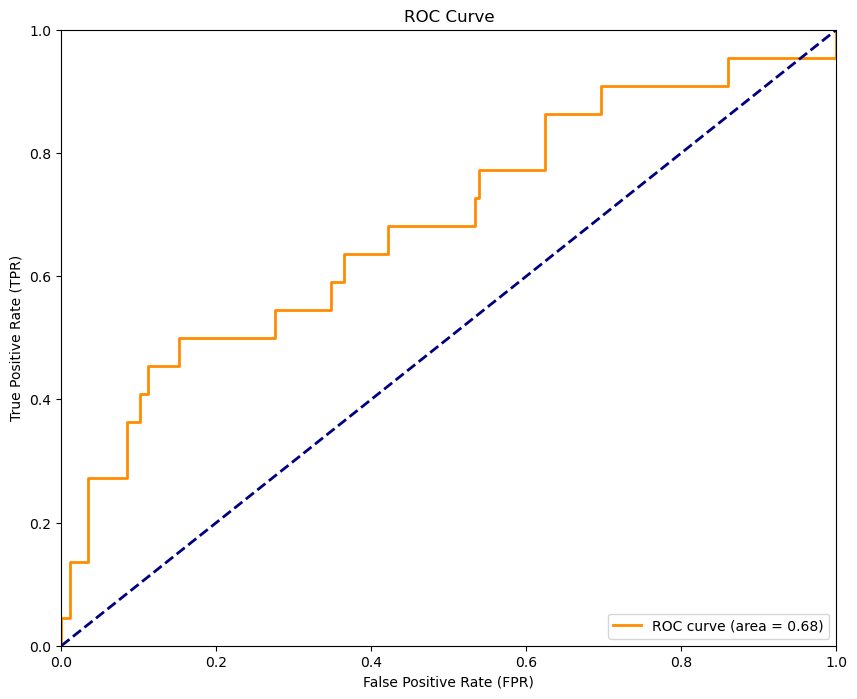

In [181]:
y_prob = model.predict_proba(X_test_normalized)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

- The logistic regression model appears to perform quite well in predicting class 0, achieving a precision of 91% and a recall of 97%. However, its performance significantly drops when predicting class 1, with a precision of only 40%, recall of 18%, and an F1-score of 25%;
- A plausible explanation for the low performance in predicting class 1 could be the imbalance in the number of observations between the classes;
- The fact that there are only 22 observations for class 1 may lead to a less accurate model for this specific class. The model might lack sufficient information to learn meaningful patterns that aid in the correct prediction of this class;
- It is crucial to consider strategies to address class imbalances, such as oversampling (increasing the number of samples in the minority class) or undersampling (reducing the number of samples in the majority class), to enhance performance in predicting class 1;
- Additionally, exploring the application of other models is a valid approach. More complex models like decision trees, random forests, or even deep learning models could be investigated to assess whether they demonstrate better performance in the specific task of predicting class 1;
- Based on the provided confusion matrix, there are 4 true positives (TP), 6 false positives (FP), 172 true negatives (TN), and 18 false negatives (FN);
- An AUC of 0.68 indicates that the model has some ability to distinguish between classes, but there is room for improvement, particularly considering the weaker performance in predicting class 1;
- In summary, the low performance in predicting class 1 may be attributed to the limited number of data points for this class. Exploring class balancing techniques and testing more complex models are crucial steps to improve the predictive quality.ality.
quality.

## **Overall Conclusions**

### **Data Process:**

- In general, **the data is reliable, accurate, and up-to-date** (covering 2022, 2023, and 2024), **but there are some inconsistencies**;
- **Missing data, duplicates, data types, language, text format, and outliers** were identified and successfully addressed during the data processing phase;
- The dataset does not encompass all car repairs undertaken in 2022 (**missing data for January 2022 and February 2022**);
- There were **12 null values** for the columns 'start_repair_date' and 'end_repair_date' (successfully replaced by considering 'repair_scheduling_date' and 'reparation_days');
- The data does **not contain any duplicates**;
- To preserve representativeness, **only one extreme outlier was excluded during the data processing**;
- If 'outliers' are found to significantly impact subsequent analyses within this study, their treatment will be applied selectively, with proper justification provided for those specific cases;
- For better manipulation and understanding of the data, the **data types of some variables in the dataset were changed**:
- "creation_date," "appraisal_date," "repair_authorization_date," "repair_scheduling_date," "towing_date," "start_repair_date," and "end_repair_date" were changed from object to datetime;
- "kms," "repair_time," and "days_delay_without_weekends," etc., were changed from object to int;
- "parts_estimate(€)," "body_metal_labor_estimate(€)," "paint_labor_estimate(€)," "paint_material_estimate(€)," "supplementary_material_estimate(€)," "body_metal_labor_hours," "paint_labor_hours," "paint_labor_hours_estimate," and "body_metal_labor_hours were changed from object to float.to float.
 to float.o float.

### **Descriptive Data Analysis:**

- The **'.describe()' method was used to generate descriptive statistics of the numeric variables** of the DataFrame;
- It provides information such as the **count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum**;
- This summary helped to understand the distribution and characteristics of the data;
- The **'.mode()' method was used to display the most frequently occurring value** of a DataFrame;

### **Exploratory Data Analysis (EDA):**

#### **Faturation**

##### Overall:

##### - Both paint and car body metal **labor prices are 39€ per hour**.
- **Total faturation**: 1 481 894 € (100%);
- **Total labour faturation (parts labour + paint labour)**: 640 180 € (28.5% + 13.4%, respectively);
- **Total parts faturation**: 729 565 € (50.3%);
- **Total paint material faturation**: 111 526 € (7.7%);
- **Total supplementary material faturation**: 625 € (less than 0.5%).

##### Carnaxide vs Queluz:

- **Total faturation**: 967 863 € (65%) and 514 032 € (35%), respectively for Carnaxide and Queluz;
- **Total labour faturation**: 455 455 € (71%) and 184 724 € (29%);
- **Total parts faturation**: 435 802 € (60%) and 	29 376 € (40%);
- **Total paint material faturation**: 76 055 € (68%) and 	3 547 € (32%);
- **Total supplementary material faturation**: 550 € (88%) and 74 € (12%).

##### 2022 vs 2023

- The year 2023 generated approximately **18 times more** revenue than 2022;
- This significant difference can be attributed (but not only!) to the **lack of data for 2022 (no data for January)**;
- It is evident that the **car repairs faturation sharply increased from May 2023 onward**; 
- **Several reasons could could be related**: the computer system might not have been fully implemented until May 2023, workshops were not operating at 100%, data entry errors, accidental data loss, a drastic decrease/increase in clients (very unlikely?), etc.;
- The **months with the highest billing volume in 2023 are October and November**;
- In contrast, **March shows the lowest billing volume in the year 2023**;
- **Average faturation per month** is 112 209 € and 7 635 €, respectively for 2022 and 2023.

#### **Labour Hours**

##### Estimated labour hours

- Total **estimated labour hours**: 16 415 hours;
- 'estimated labour hours' did not reflect in terms of 'real labour hours';
- **On average, 91 and 1 227 'estimated labor hours' were performed per month** during the years 2022 and 2023, respectively;
- **May and November** were the months with the highest record **estimated labor hours**;
- In the other hand, the **first four months** of the year 2023 accounted for **fewer estimated labour hours**.

##### Real labour hours

- Total **real labour hours**: 7 490 hours;
- Approximately 2.1 times **fewer** labor hours were really carried out than were estimated;
- On average, 551 and 51 **real labor hours** were performed per month during the years 2022 and 2023, respectively;
- **July and November** were the months with the highest recorded **real labor hours**;
- The total **real labor hours performed by Carnaxide and Queluz were 5064 (68%) and 2425 (32%)**, respectively	
- Both workshops show a tendency to complete repairs in less time than initially estimated, but **Carnaxide, with its higher ratio (2.31 vs 1.95), indicates a higher probability of reducing the estimated repair time compared to Queluz**;
- Average **real labour hour per repair** in Carnaxide: 7.44 hours;
- Average **real labour hours per repair** in Queluz: 7.68 hours.

#### Car Repairs

- In total, there were **997 repairs**, of which 681 (68%) were carried out in Carnaxide and 316 (32%) in Queluz;
- In **2022**, Carnaxide recorded 49 repairs, and Queluz had 19;
- In **2023**,  Carnaxide totaled 596 repairs, and Queluz had 282;
- In **2024**, Carnaxide had 36 repairs, and Queluz had 15.
- In total, **111 cars were towed** (11% of all car repairs).
- **Carnaxide had 4% of the repairs related to towed cars, while Queluz had 27% (3.44 more)**;
- Possibly, the **higher delay percentage in total repairs at the Queluz workshop may be related with the fact of receiving a significantly larger number of towed cars compared to Carnaxide**. These vehicles take up space in the workshop while waiting for repair authorization.

#### Delays

- **Total delay labour days**: 286 days;
- 137 delay repair days (48%) were recorded in Carnaxide, and 149 (52%) in Queluz;
- **Number of repairs with delay**: 94 car repairs;
- 54 number of car repairs with delay (57%) were registered in Carnaxide, and 40 (43%) in Queluz;
- **8% and 13% of the vehicles repaired in Carnaxide and Queluz**, respectively, experienced delays.
- On average, there is a **delay of 0.20 and 0.47 days by car repair**, respectively, for **Carnaxide and Queluz**.

#### **Car's duration in the repair shop (days):**

##### Only towed cars

- Average number of days (weekend included) a **towed car remains in the workshop until it starts to be repaired**: 10.8 (**7.7 for Carnaxide** and **11.7 for Queluz**);
- Average number of days (weekend included) a **towed car remains in the workshop until repair authorization date**: 7.5 (**1.5 for Carnaxide** and **9.2 for Queluz**)
- The repair authorization for **towed cars in Queluz** takes significantly longer time (**six times more**) to be approved than **in comparison to Carnaxide**.
- Average days (weekend included) **between repair authorization date and repair scheduling date** of a towed car: 3.5 (**6.1 for Carnaxide** and **2.7 for Queluz**)
- After the repair authorization is approved, the average **difference in days until the repair gets start is smaller in Queluz** than in Carnaxide (**2 times smaller**).
- **Queluz is more efficient in scheduling repairs**, potentially **compensating for the initial authorization date delay**.

##### All cars

- The **average time to repair a car is between 3 and 3,5 days** (weekend included) -  (**2.7 for Carnaxide** and **4.6 for Queluz**);.
- This average value is lower than the **average estimated repair time (4,5 days** - not weekend included).
- This suggests that the actual average repair time may be even less than 3.3 days.
- Average days (weekend included) **between repair authorization date and repair scheduling date**: 23.6  (**26.3 for Carnaxide** and **18 for Queluz**);
- The difference between the repair authorization date and the repair scheduling date is much higher in all cars (that were or not towed) when compared to towed cars only (3.5 days average), suggesting that **towed cars are prioritized** in this aspect;
- Average days (weekend included) **between repair authorization date and start repair date**: 23.6 (**26.4 for Carnaxide** and **17.5 for Queluz**);
- Average days (weekend included) **between repair authorization date and end repair date**: 26.9 (**29.1 for Carnaxide** and **22.1 for Queluz**);
- Average days (weekend included) **between repair scheduling date and start repair date**: -0.01 (**0.02 for Carnaxide** and **-0.09 for Queluz**);
- This information suggests that, on average, **repairs start as scheduled**.
- In the case of Queluz, repairs tend to start very slightly ahead of schedule.

#### **Reparations start date:**

- Number of **reparation started before schedule**: 13 (**2 for Carnaxide** and **11 for Queluz**);
- Number of repairs **started before schedule but still delays**: 1 (**Queluz**);
- Number of reparation **started after schedule**: 16 (**12 for Carnaxide** and **4 for Queluz**);
- Number of repairs **started after schedule with delays**: 3 (**1 for Carnaxide** and **2 for Queluz**);
- Repairs starting after the scheduled time have a relatively higher probability of resulting in delays, with a count of 3 cases in this category;
- However, this factor is not highly significant, as delays were also observed in situations where the repair started before the scheduled time;
- This analysis suggests that the initiation time of repairs is not the determining factor for delays, indicating the hypothesis of other factors;
- Number of reparation **started at schedule**: 968.

#### **Brands**

##### Number of repairs

- **Peugeot, Renault, BMW, Volvo, and Mercedes-Benz** were the car brands with the **highest number of repairs** (184, 151, 108, 63, and 62, respectively);
- **Smart, Honda, Kia, Land Rover, Porsche, Mazda, Alfa Romeo, and Tesla** had the **least number of repairs**, each with **only 1 repair**.

##### Total faturation

- **Peugeot, Renault, BMW, Mercedes-Benz and Volvo** had the **highest total faturation** (betewwen 90 000 to 260 000 euros);
- **Peugeot, Renault, BMW, Mercedes-Benz and Volvo** were the car brands with the **highest percentages of total faturation** (18%, 15%, 12%, 9%, and 6%, respectively);
- **Mercedes-benz, Skoda, Nissa, BMW and Seat** presented the **highest values for total faturation per car repair** (between 1500 and 2250 euros).

##### Parts faturation

- **Peugeot, Renault, BMW, Mercedes-Benz and Volvo** had the **highest parts faturation** (betewwen 50 000 to 130 000 euros);
- **Peugeot, Renault, BMW, Mercedes-Benz and Volvo** were the car brands with the **highest percentages of parts faturation** (17%, 16%, 12%, 7%, and 6%, respectively);
- **Skoda, Nissan, Mercedes-Benz, BMW and Volvo** presented the **highest values for parts faturation per car repair** (between 790 and 1100 euros).

##### Labour faturation

- **Peugeot, Renault, BMW, Mercedes-Benz and Volvo** had the **highest labour faturation** (betewwen 36 500 to 114 000 euros);
- **Peugeot, Renault, Mercedes-Benz, BMW and Volvo** were the car brands with the **highest percentages of labour faturation** (18%, 14%, 12%, 11%, and 6%, respectively);
- **Mercedes-Benz** stands out distinctly as the car brand with the **highest labor faturation per car repair (1250 euros)**, suggesting that this type of car requires a higher number of hours for repair when compared to other brands;
- The remaining top 5 is completed by **Nissan, Volkswagen, BMW, and Seat**, with **labor faturation values per car repair ranging between 645 and 775 euros**.

##### Delays

- **Renault, Peugeot, BMW, Opel, and Fiat** had the **highest numbers of delays in car repairs** (17, 16, 11, 8, and 8, respectively).
- **Fiat, Toyota, Opel, Mercedes-Benz, and Renault** were the car brands that experienced the **highest percentages of delays in their repairs** (19%, 15%, 13%, 11%, and 11%, respectively). For example, 19% of Fiat car repairs suffered delays during the repair process;
- **Mercedes-Benz** stands out distinctly as the car brand with the **highest average days of delay per repair (0.72 days)**, suggesting that this type of car can be particularly susceptible to delays;
- The remaining top 5 is completed by **Renault, Fiat, Toyota, and BMW** with average values of **days of delay per repair of 0.55, 0.49, 0.44, and 0.25**, respectively.

### **Predictive Model:**

#### Classification with Logistic Regression

- Determine whether a new repair **will have a delay or not (class 1 and class 0, respectively)**.
- The **logistic regression model** appears to perform well in predicting **class 0, with a precision of 91%, recall of 97% and F1-score of 93%**. However, its performance significantly drops when predicting **class 1, with a precision of only 40%, recall of 18%, and an F1-score of 25%**;
- **Accuracy of 88%**;
- The model **struggles with class 1 predictions** due to a **small number of observations** for that class;
- Strategies like **oversampling or undersampling** should be considered **to improve class balance and boost the model's accuracy for class 1**;
- **Trying more complex models** like decision trees or random forests for accurate predictions;
- Based on the provided **confusion matrix**, there are **4 true positives (TP), 6 false positives (FP), 172 true negatives (TN), and 18 false negatives (FN)**;
- The **AUC of 0.68** suggests the model can somewhat distinguish classes, but improvements, especially for class 1 predictions, are needed.

## **Main Insights**:

- **Lack of Data for 2022:** The significant difference in car repairs between 2022 and subsequent years can be partly attributed to the absence of data for January 2022. Possible reasons for this could include a delay in the implementation of the computer system, operational issues, data entry errors, or data loss.

- **Increase in Repairs from May 2023 Onward:** The noticeable rise in car repairs from May 2023 onwards suggests a potential change in workshop operations. Possible factors include the full implementation of the computer system, improved workshop efficiency, or changes in customer demand.

- **Towed Cars Impact on Delays:** The higher percentage of towed cars in Queluz (27%) compared to Carnaxide (4%) may contribute to delays in total repairs at the Queluz workshop. Towed vehicles occupying workshop space while waiting for repair authorization could be a key factor.

- **Delays Analysis:** The average delay per repair was higher in Queluz. This indicates a potential issue with repair authorization times and scheduling delays, particularly for towed cars.

- **Brand-specific Insights:** Mercedes-Benz cars stand out with the highest labor faturation per repair and the highest average days of delay per repair. This suggests that Mercedes-Benz repairs may require more labor hours and could be more susceptible to delays compared to other brands.

- **Repair Scheduling and Timing:** The analysis of repairs started before or after the scheduled time indicates that delays are not solely determined by the initiation time. Other factors may contribute to delays, emphasizing the need to investigate and address potential issues in the repair process.

- **Operational Differences:** The observed variations in authorization, scheduling, and repair start times between Carnaxide and Queluz indicate potential operational differences between the two workshops. Investigating and addressing the specific factors contributing to these differences could lead to more streamlined processes and reduced delays, ultimately improving overall workshop efficiency.

## **Potential Preventive and Corrective Actions:**

**Data Management:**
- Establish regular backups to prevent accidental data loss;
- Ensure computer systems are fully implemented and operational.

**Repair Management:**
- Develop strategies to optimize workshop space allocation, especially for towed vehicles, reducing wait times for repair authorization;
- Invest in measures that streamline the repair authorization process, minimizing delays.

**Delay Management:**
- Analyze new delay patterns to identify specific causes and implement future corrective measures;
- Evaluate and adjust repair scheduling to optimize wait times and avoid workshop congestion.

**Brand Management:**
- For the Mercedes-Benz brand, consider allocating additional resources if needed to expedite repairs and reduce delay days;
- Closely monitor other brands with high delay times (Renault, Fiat, Toyota, and BMW) and implement specific strategies as applicable;
- Consider implementing brand-specific performance evaluation systems to identify and address recurring delays.

**Scheduling Management:**
- Reinforce the importance of adhering to scheduled timings to minimize delays;
- Assess the impact of repairs initiated before or after the scheduling and make adjustments as necessary.ments as necessary. as necessary.
